# More analysis and visualization based on stage 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from decimal import Decimal
from plotnine import *
import matplotlib as mpl
from shapely.geometry import Point
import scipy
import plotnine
import math
import sys, os
import re
import mapclassify
from matplotlib import font_manager
import wordcloud
import seaborn as sb

In [2]:
mpl.rcParams['figure.figsize'] = [15,9]
mpl.style.use('ggplot')
mpl.rcParams['font.family']= "sans-serif"
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

In [3]:
listing_path = 'listings_dec18.csv'
neighbourhoods_path = 'neighbourhoods_dec18.csv'
reviews_path = 'reviews_dec18.csv'
calendar = 'calendar_dec18.csv'

In [4]:
listings = pd.read_csv(listing_path)
neighbourhoods = pd.read_csv(neighbourhoods_path)
reviews = pd.read_csv(reviews_path)
calendar = pd.read_csv(calendar)

/Users/joanna/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
listings

id                            listing_url       scrape_id  \
0         12351     https://www.airbnb.com/rooms/12351  20181207034750   
1         14250     https://www.airbnb.com/rooms/14250  20181207034750   
2         15253     https://www.airbnb.com/rooms/15253  20181207034750   
3         20865     https://www.airbnb.com/rooms/20865  20181207034750   
4         26174     https://www.airbnb.com/rooms/26174  20181207034750   
...         ...                                    ...             ...   
36657  30592081  https://www.airbnb.com/rooms/30592081  20181207034750   
36658  30592161  https://www.airbnb.com/rooms/30592161  20181207034750   
36659  30592248  https://www.airbnb.com/rooms/30592248  20181207034750   
36660  30592505  https://www.airbnb.com/rooms/30592505  20181207034750   
36661  30593866  https://www.airbnb.com/rooms/30593866  20181207034750   

      last_scraped                                               name  \
0       2018-12-07                  Sydney City & Harbour at the door   
1       2018-12-07                                Manly Harbour House   
2       2018-12-07  Stunning Penthouse Apartment In Heart Of The City   
3       2018-12-07                 3 BED HOUSE + 1 BED STUDIO Balmain   
4       2018-12-07                 COZY PRIVATE ROOM, GREAT LOCATION!   
...            ...                                                ...   
36657   2018-12-07                             The top floor paradise   
36658   2018-12-07   Sydney harbour catamaran sailing. Parties for 10   
36659   2018-12-07  Double Room built-in a large and bright apartment   
36660   2018-12-07     Bright Modern apartment in a Premiere location   
36661   2018-12-07   Huge Sunny Double Room with Spa in Best Location   

                                                 summary  \
0      Come stay with Vinh & Stuart (Awarded as one o...   
1      Beautifully renovated, spacious and quiet, our...   
2      Penthouse living in a great central location: ...   
3      Hi! We are a married professional couple with ...   
4                                                    NaN   
...                                                  ...   
36657  This top floor paradise offers a very bright a...   
36658  Organise your function/party for 10 people on ...   
36659  New Double Room with light filled interiors id...   
36660  Generous space with 2 bed rooms ,2 bathrooms ,...   
36661  Beautiful natural sunny apartment with spa, po...   

                                                   space  \
0      We're pretty relaxed hosts, and we fully appre...   
1      Our home is a thirty minute walk along the sea...   
2      A charming two-level, two-bedroom, two-bathroo...   
3      HOUSE : _________ * DUCTED AIR CONDITIONING IN...   
4      Double bed in decent sized bedroom, in two bed...   
...                                                  ...   
36657                                                NaN   
36658  The catamaran is spacious and ideal for functi...   
36659  8 min from Homebush train Station 3 min from B...   
36660  2 bed rooms both with a Queen size bed . one w...   
36661  Let's talk about the room. This room is fully ...   

                                             description experiences_offered  \
0      Come stay with Vinh & Stuart (Awarded as one o...                none   
1      Beautifully renovated, spacious and quiet, our...                none   
2      Penthouse living in a great central location: ...                none   
3      Hi! We are a married professional couple with ...                none   
4      Double bed in decent sized bedroom, in two bed...                none   
...                                                  ...                 ...   
36657  This top floor paradise offers a very bright a...                none   
36658  Organise your function/party for 10 people on ...                none   
36659  New Double Room with light filled interiors id...                none   
36660

In [7]:
columns_to_keep = ['id','listing_url','host_has_profile_pic','host_since','neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                   'host_is_superhost','description',
                   'latitude', 'longitude','is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'price','weekly_price','monthly_price',
                   'cleaning_fee', 'review_scores_rating','reviews_per_month', 'number_of_reviews',
                   'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication','review_scores_location', 'review_scores_value',
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights', 'host_response_rate',
                   'host_acceptance_rate', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
                   'availability_365']
listings = listings[columns_to_keep]

In [8]:
listings

id                            listing_url host_has_profile_pic  \
0         12351     https://www.airbnb.com/rooms/12351                    t   
1         14250     https://www.airbnb.com/rooms/14250                    t   
2         15253     https://www.airbnb.com/rooms/15253                    t   
3         20865     https://www.airbnb.com/rooms/20865                    t   
4         26174     https://www.airbnb.com/rooms/26174                    t   
...         ...                                    ...                  ...   
36657  30592081  https://www.airbnb.com/rooms/30592081                    t   
36658  30592161  https://www.airbnb.com/rooms/30592161                    t   
36659  30592248  https://www.airbnb.com/rooms/30592248                    t   
36660  30592505  https://www.airbnb.com/rooms/30592505                    t   
36661  30593866  https://www.airbnb.com/rooms/30593866                    t   

       host_since neighbourhood_cleansed  neighbourhood_group_cleansed  \
0      2009-05-14                 Sydney                           NaN   
1      2009-11-20                  Manly                           NaN   
2      2009-12-03                 Sydney                           NaN   
3      2009-12-19             Leichhardt                           NaN   
4      2010-04-19              Woollahra                           NaN   
...           ...                    ...                           ...   
36657  2018-12-06              Woollahra                           NaN   
36658  2018-10-31             Canada Bay                           NaN   
36659  2017-03-06            Strathfield                           NaN   
36660  2018-12-06               Rockdale                           NaN   
36661  2015-12-12                 Sydney                           NaN   

      host_is_superhost                                        description  \
0                     f  Come stay with Vinh & Stuart (Awarded as one o...   
1                     f  Beautifully renovated, spacious and quiet, our...   
2                     f  Penthouse living in a great central location: ...   
3                     t  Hi! We are a married professional couple with ...   
4                     f  Double bed in decent sized bedroom, in two bed...   
...                 ...                                                ...   
36657                 f  This top floor paradise offers a very bright a...   
36658                 f  Organise your function/party for 10 people on ...   
36659                 f  New Double Room with light filled interiors id...   
36660                 f  Generous space with 2 bed rooms ,2 bathrooms ,...   
36661                 f  Beautiful natural sunny apartment with spa, po...   

        latitude   longitude  ... security_deposit extra_people  \
0     -33.865153  151.191896  ...            $0.00      $395.00   
1     -33.800929  151.261722  ...          $900.00       $40.00   
2     -33.880455  151.216541  ...              NaN       $10.00   
3     -33.859072  151.172753  ...          $800.00        $0.00   
4     -33.889087  151.259404  ...            $0.00       $15.00   
...          ...         ...  ...              ...          ...   
36657 -33.874940  151.259375  ...              NaN        $0.00   
36658 -33.847841  151.149573  ...              NaN        $0.00   
36659 -33.863719  151.081721  ...              NaN        $0.00   
36660 -33.929960  151.150659  ...          $500.00        $0.00   
36661 -33.906938  151.211255  ...              NaN        $0.00   

      guests_included  minimum_nights  host_response_rate  \
0                   2               2                100%   
1                   6               5                 90%   
2                   1               2                100%   
3                   6               7                100%   
4                   1               1                 NaN   
...               ...             ...                 ...   
36657 

In [9]:
# Convert string of prices to floats
# convert data type of 'price' to numeric
listings.price=listings.price.str.replace('$','')
listings.price=listings.price.str.replace(',','').astype(float)

listings.weekly_price=listings.weekly_price.str.replace('$','')
listings.weekly_price=listings.weekly_price.str.replace(',','').astype(float)

listings.monthly_price=listings.monthly_price.str.replace('$','')
listings.monthly_price=listings.monthly_price.str.replace(',','').astype(float)

listings.security_deposit=listings.security_deposit.str.replace('$','')
listings.security_deposit=listings.security_deposit.str.replace(',','').astype(float)

listings.cleaning_fee=listings.cleaning_fee.str.replace('$','')
listings.cleaning_fee=listings.cleaning_fee.str.replace(',','').astype(float)

listings.extra_people=listings.extra_people.str.replace('$','')
listings.extra_people=listings.extra_people.str.replace(',','').astype(float)

calendar.price = calendar.price.str.replace('$','')
calendar.price = calendar.price.str.replace(',','').astype(float)


# Convert date string to datetime
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')
calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')

/Users/joanna/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
listings.columns[listings.isna().sum()>28300]

Index(['neighbourhood_group_cleansed', 'weekly_price', 'monthly_price',
       'host_acceptance_rate'],
      dtype='object')

In [11]:
listings.isna().sum()

id                                  0
listing_url                         0
host_has_profile_pic                6
host_since                          6
neighbourhood_cleansed              0
neighbourhood_group_cleansed    36662
host_is_superhost                   6
description                       546
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          19
bedrooms                            9
bed_type                            0
amenities                           0
price                               0
weekly_price                    33011
monthly_price                   34449
cleaning_fee                    10538
review_scores_rating            13126
reviews_per_month               11937
number_of_reviews                   0
review_scores_accuracy          13171
review_score

In [12]:
listings[['is_location_exact', 'host_is_superhost', 'is_business_travel_ready',
         'instant_bookable', 'host_has_profile_pic']].head()

is_location_exact host_is_superhost is_business_travel_ready  \
0                 t                 f                        f   
1                 t                 f                        f   
2                 f                 f                        f   
3                 t                 t                        f   
4                 t                 f                        f   

  instant_bookable host_has_profile_pic  
0                f                    t  
1                f                    t  
2                t                    t  
3                f                    t  
4                f                    t

In [13]:
for column in ['is_location_exact', 'host_is_superhost',
               'is_business_travel_ready', 'instant_bookable', 'host_has_profile_pic']:
    listings[column] = listings[column].map({'f':0,'t':1})

/Users/joanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
listings['price'].describe()

count    36662.000000
mean       207.689597
std        323.818795
min          0.000000
25%         80.000000
50%        136.000000
75%        223.000000
max      14999.000000
Name: price, dtype: float64

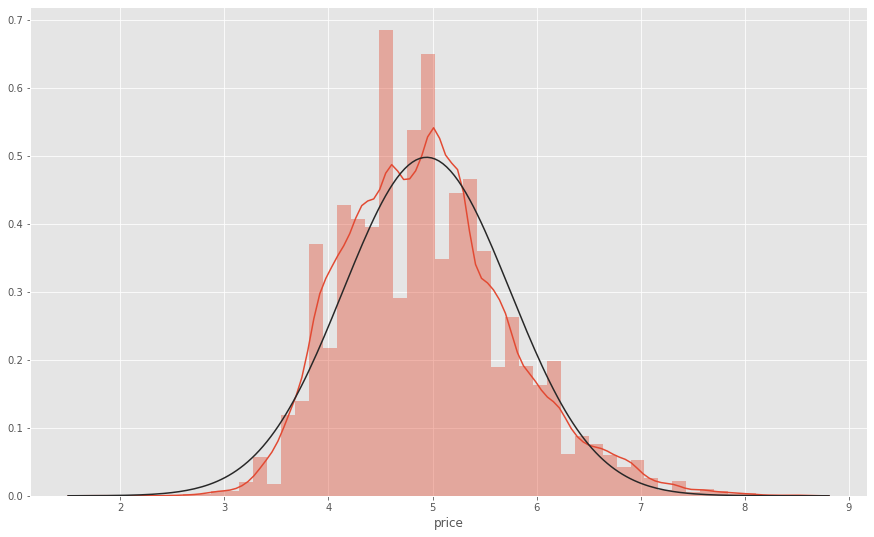

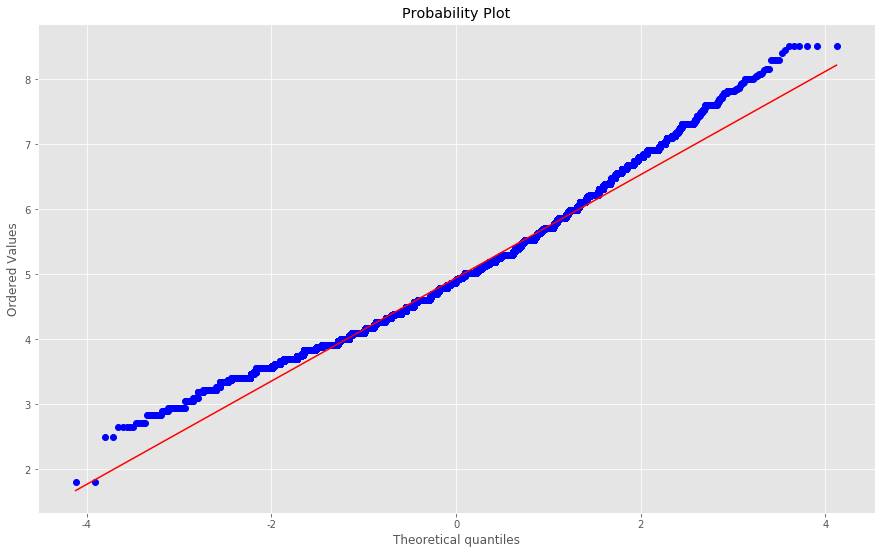

In [15]:
from scipy.stats import norm
listings = listings[listings.price<=5000]
listings = listings[listings.price>0]
sns.distplot(np.log(listings.price), fit=norm)
fig = plt.figure()
res = scipy.stats.probplot(np.log(listings.price), plot=plt)

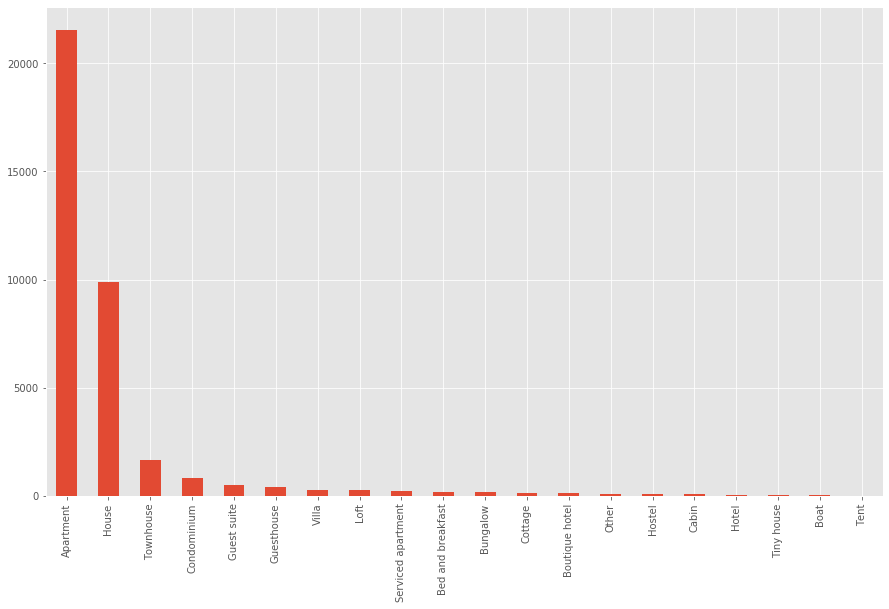

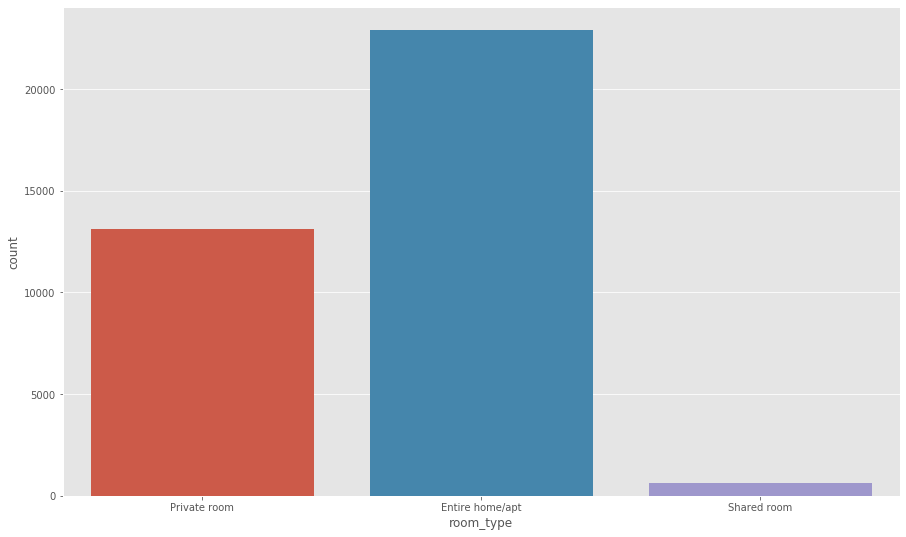

In [16]:
listings['property_type'].value_counts()[:20].plot(kind='bar')
plt.figure()
sns.countplot(x='room_type',data=listings)
plt.show()
# ggplot(listings, aes(x='room_type', fill='room_type')) + geom_bar(stat='count')

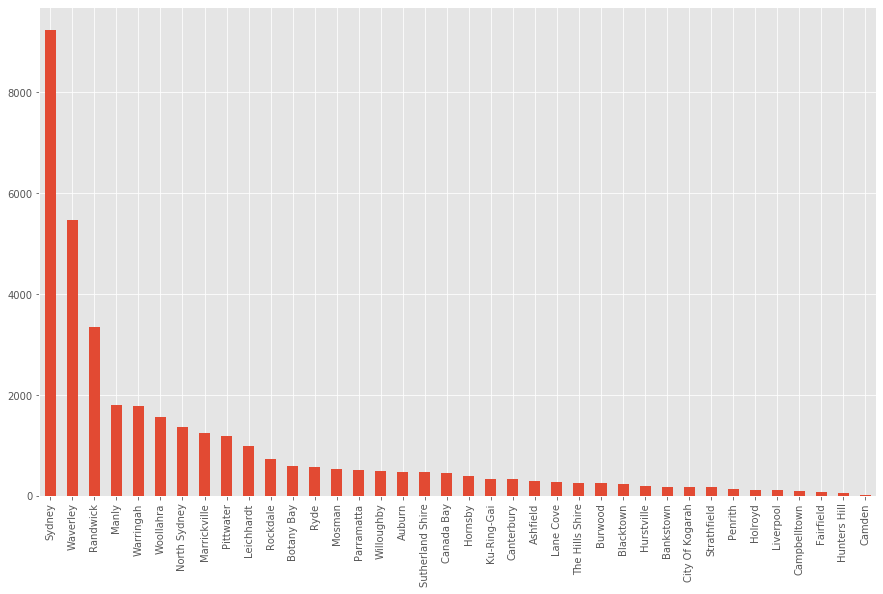

In [17]:
plt.figure()
listings['neighbourhood_cleansed'].value_counts().plot(kind='bar')

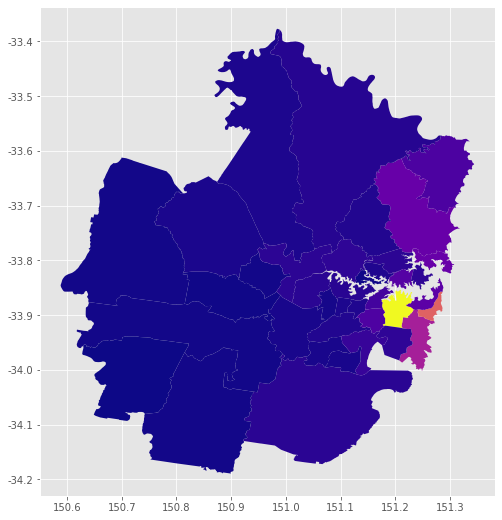

In [18]:
import geopandas as gpd

sydney_gd = gpd.GeoDataFrame.from_file('neighbourhoods.geojson')
neighbourhood_add = []
counts = listings['neighbourhood_cleansed'].value_counts()
for i in range(len(sydney_gd.index)):
    neighbourhood_add.append(counts[sydney_gd.iloc[i].neighbourhood])    
sydney_gd['counts'] = neighbourhood_add
sydney_gd.plot(column='counts',cmap='plasma')
plt.show()

In [19]:
neighbourhood_gpd = gpd.GeoDataFrame.from_file('neighbourhoods.geojson') 
neighbourhood_gpd.head()

neighbourhood neighbourhood_group  \
0     Pittwater                None   
1      Randwick                None   
2      Waverley                None   
3     Warringah                None   
4     Lane Cove                None   

                                            geometry  
0  (POLYGON ((151.296135 -33.572925, 151.296182 -...  
1  (POLYGON ((151.237223 -33.89075, 151.237312 -3...  
2  (POLYGON ((151.283365 -33.861826, 151.283342 -...  
3  (POLYGON ((151.211404 -33.615209, 151.211567 -...  
4  (POLYGON ((151.166344 -33.806213, 151.166496 -...

In [20]:
def listing_to_gbd(data):
    data['geometry'] = list(zip(data['longitude'],data['latitude']))
    data['geometry'] = data['geometry'].apply(Point)
    data = gpd.GeoDataFrame(data)
    return data
listing_gbd = listing_to_gbd(listings)
listing_gbd.head()

id                         listing_url  host_has_profile_pic  \
0  12351  https://www.airbnb.com/rooms/12351                   1.0   
1  14250  https://www.airbnb.com/rooms/14250                   1.0   
2  15253  https://www.airbnb.com/rooms/15253                   1.0   
3  20865  https://www.airbnb.com/rooms/20865                   1.0   
4  26174  https://www.airbnb.com/rooms/26174                   1.0   

   host_since neighbourhood_cleansed  neighbourhood_group_cleansed  \
0  2009-05-14                 Sydney                           NaN   
1  2009-11-20                  Manly                           NaN   
2  2009-12-03                 Sydney                           NaN   
3  2009-12-19             Leichhardt                           NaN   
4  2010-04-19              Woollahra                           NaN   

   host_is_superhost                                        description  \
0                0.0  Come stay with Vinh & Stuart (Awarded as one o...   
1                0.0  Beautifully renovated, spacious and quiet, our...   
2                0.0  Penthouse living in a great central location: ...   
3                1.0  Hi! We are a married professional couple with ...   
4                0.0  Double bed in decent sized bedroom, in two bed...   

    latitude   longitude  ...  extra_people guests_included minimum_nights  \
0 -33.865153  151.191896  ...         395.0               2              2   
1 -33.800929  151.261722  ...          40.0               6              5   
2 -33.880455  151.216541  ...          10.0               1              2   
3 -33.859072  151.172753  ...           0.0               6              7   
4 -33.889087  151.259404  ...          15.0               1              1   

   host_response_rate  host_acceptance_rate  instant_bookable  \
0                100%                   NaN                 0   
1                 90%                   NaN                 0   
2                100%                   NaN                 1   
3                100%                   NaN                 0   
4                 NaN                   NaN                 0   

  is_business_travel_ready          cancellation_policy  availability_365  \
0                        0  strict_14_with_grace_period               187   
1                        0  strict_14_with_grace_period               321   
2                        0  strict_14_with_grace_period               316   
3                        0  strict_14_with_grace_period                69   
4                        0                     moderate               140   

                                       geometry  
0  POINT (151.1918958878082 -33.86515254975741)  
1  POINT (151.2617221941787 -33.80092902849084)  
2   POINT (151.2165408022156 -33.8804548565453)  
3  POINT (151.1727532312573 -33.85907160875455)  
4  POINT (151.2594039642279 -33.88908693069203)  

[5 rows x 42 columns]

In [21]:
listings['neighbourhood']=listings['neighbourhood_cleansed']
neighbourhood_gpd_groupby = listing_gbd[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id',ascending=False).reset_index()
new_neighbourhood = neighbourhood_gpd.merge(neighbourhood_gpd_groupby,on='neighbourhood', how='left')
new_neighbourhood.head(100)

neighbourhood neighbourhood_group  \
0          Pittwater                None   
1           Randwick                None   
2           Waverley                None   
3          Warringah                None   
4          Lane Cove                None   
5       North Sydney                None   
6          Bankstown                None   
7         Canterbury                None   
8        Strathfield                None   
9             Auburn                None   
10   The Hills Shire                None   
11      Hunters Hill                None   
12            Sydney                None   
13        Botany Bay                None   
14        Hurstville                None   
15         Fairfield                None   
16         Blacktown                None   
17           Holroyd                None   
18          Ashfield                None   
19      Marrickville                None   
20  Sutherland Shire                None   
21          Rockdale                None   
22   City Of Kogarah                None   
23        Parramatta                None   
24              Ryde                None   
25        Leichhardt                None   
26           Hornsby                None   
27       Ku-Ring-Gai                None   
28        Willoughby                None   
29         Liverpool                None   
30           Penrith                None   
31        Canada Bay                None   
32            Camden                None   
33      Campbelltown                None   
34            Mosman                None   
35             Manly                None   
36         Woollahra                None   
37           Burwood                None   

                                             geometry    id  
0   (POLYGON ((151.296135 -33.572925, 151.296182 -...  1191  
1   (POLYGON ((151.237223 -33.89075, 151.237312 -3...  3345  
2   (POLYGON ((151.283365 -33.861826, 151.283342 -...  5461  
3   (POLYGON ((151.211404 -33.615209, 151.211567 -...  1793  
4   (POLYGON ((151.166344 -33.806213, 151.166496 -...   287  
5   (POLYGON ((151.214558 -33.815835, 151.214606 -...  1370  
6   (POLYGON ((151.032442 -33.88828, 151.03248 -33...   180  
7   (POLYGON ((151.114181 -33.895776, 151.114607 -...   339  
8   (POLYGON ((151.083983 -33.857847, 151.084167 -...   171  
9   (POLYGON ((151.079343 -33.822435, 151.079576 -...   469  
10  (POLYGON ((150.984688 -33.387079, 150.984016 -...   260  
11  (POLYGON ((151.140722 -33.818195, 151.140823 -...    69  
12  (POLYGON ((151.208718 -33.853654, 151.20872 -3...  9233  
13  (POLYGON ((151.223497 -33.925565, 151.223579 -...   600  
14  (POLYGON ((151.101013 -33.940445, 151.101111 -...   195  
15  (POLYGON ((150.836411 -33.820753, 150.841286 -...    76  
16  (POLYGON ((150.874818 -33.657894, 150.875121 -...   237  
17  (POLYGON ((150.951692 -33.788947, 150.951842 -...   125  
18  (POLYGON ((151.148571 -33.870445, 151.148593 -...   305  
19  (POLYGON ((151.128507 -33.904777, 151.128607 -...  1251  
20  (POLYGON ((150.999088 -33.98287, 150.999494 -3...   468  
21  (POLYGON ((151.155862 -33.927773, 151.155904 -...   727  
22  (POLYGON ((151.136243 -33.969628, 151.136265 -...   179  
23  (POLYGON ((151.001061 -33.773418, 151.001093 -...   520  
24  (POLYGON ((151.109374 -33.762592, 151.109446 -...   575  
25  (POLYGON ((151.185484 -33.845988, 151.185818 -...   998  
26  (POLYGON ((150.992991 -33.387195, 150.993058 -...   391  
27  (POLYGON ((151.166573 -33.66387, 151.16673 -33...   339  
28  (POLYGON ((151.208913 -33.778598, 151.208998 -...   500  
29  (POLYGON ((150.797555 -33.88088, 150.797809 -3...   116  
30  (POLYGON ((150.710722 -33.614371, 150.71102 -3...   132  
31  (POLYGON ((151.115094 -33.850011, 151.115086 -...   449  
32  (POLYGON ((150.708294 -33.938843, 150.709742 -...    29  
33  (POLYGON ((150.892488 -33.961122, 150.893363 -...   101  
34  (POLYGON ((151.247279 -33.806183, 151.247285 -...   533  
35  (POLYGON ((151.240353 -33.779672, 151.24164 -3...  179

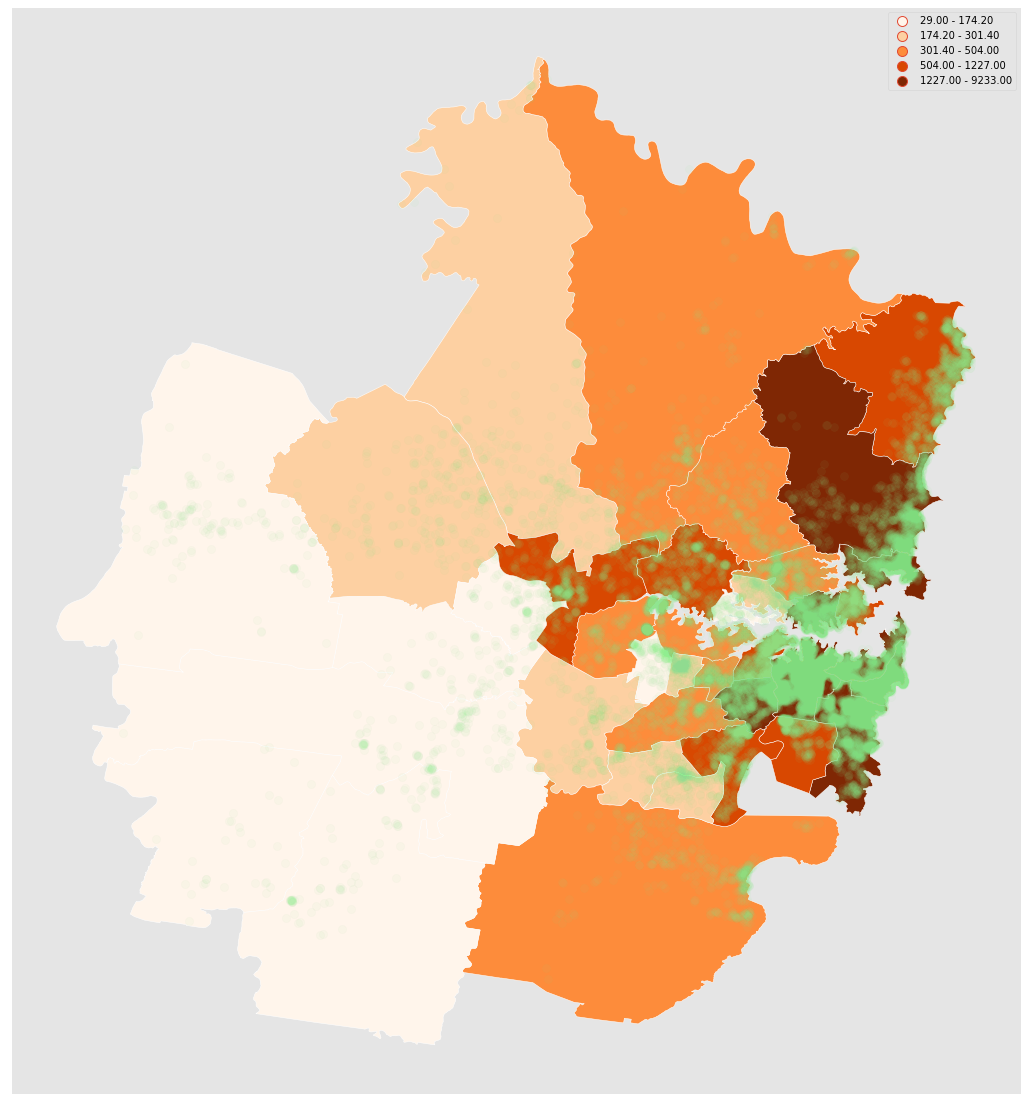

In [22]:
base = new_neighbourhood.plot(column='id',cmap='Oranges',scheme='quantiles', legend=True,edgecolor='white',figsize=(20,20))
listing_gbd.plot(ax=base,color='lightgreen',marker='o',markersize=65,alpha=0.05)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

In [23]:
def explode_situtation(data):
    explode = {}
    for i in range(len(data)):
        if data[i]>data.mean():
            explode[data.index[i]] = 0.1
        else:
            explode[data.index[i]] = 0
    return explode
explode = list(explode_situtation(listings.neighbourhood.value_counts()).values())

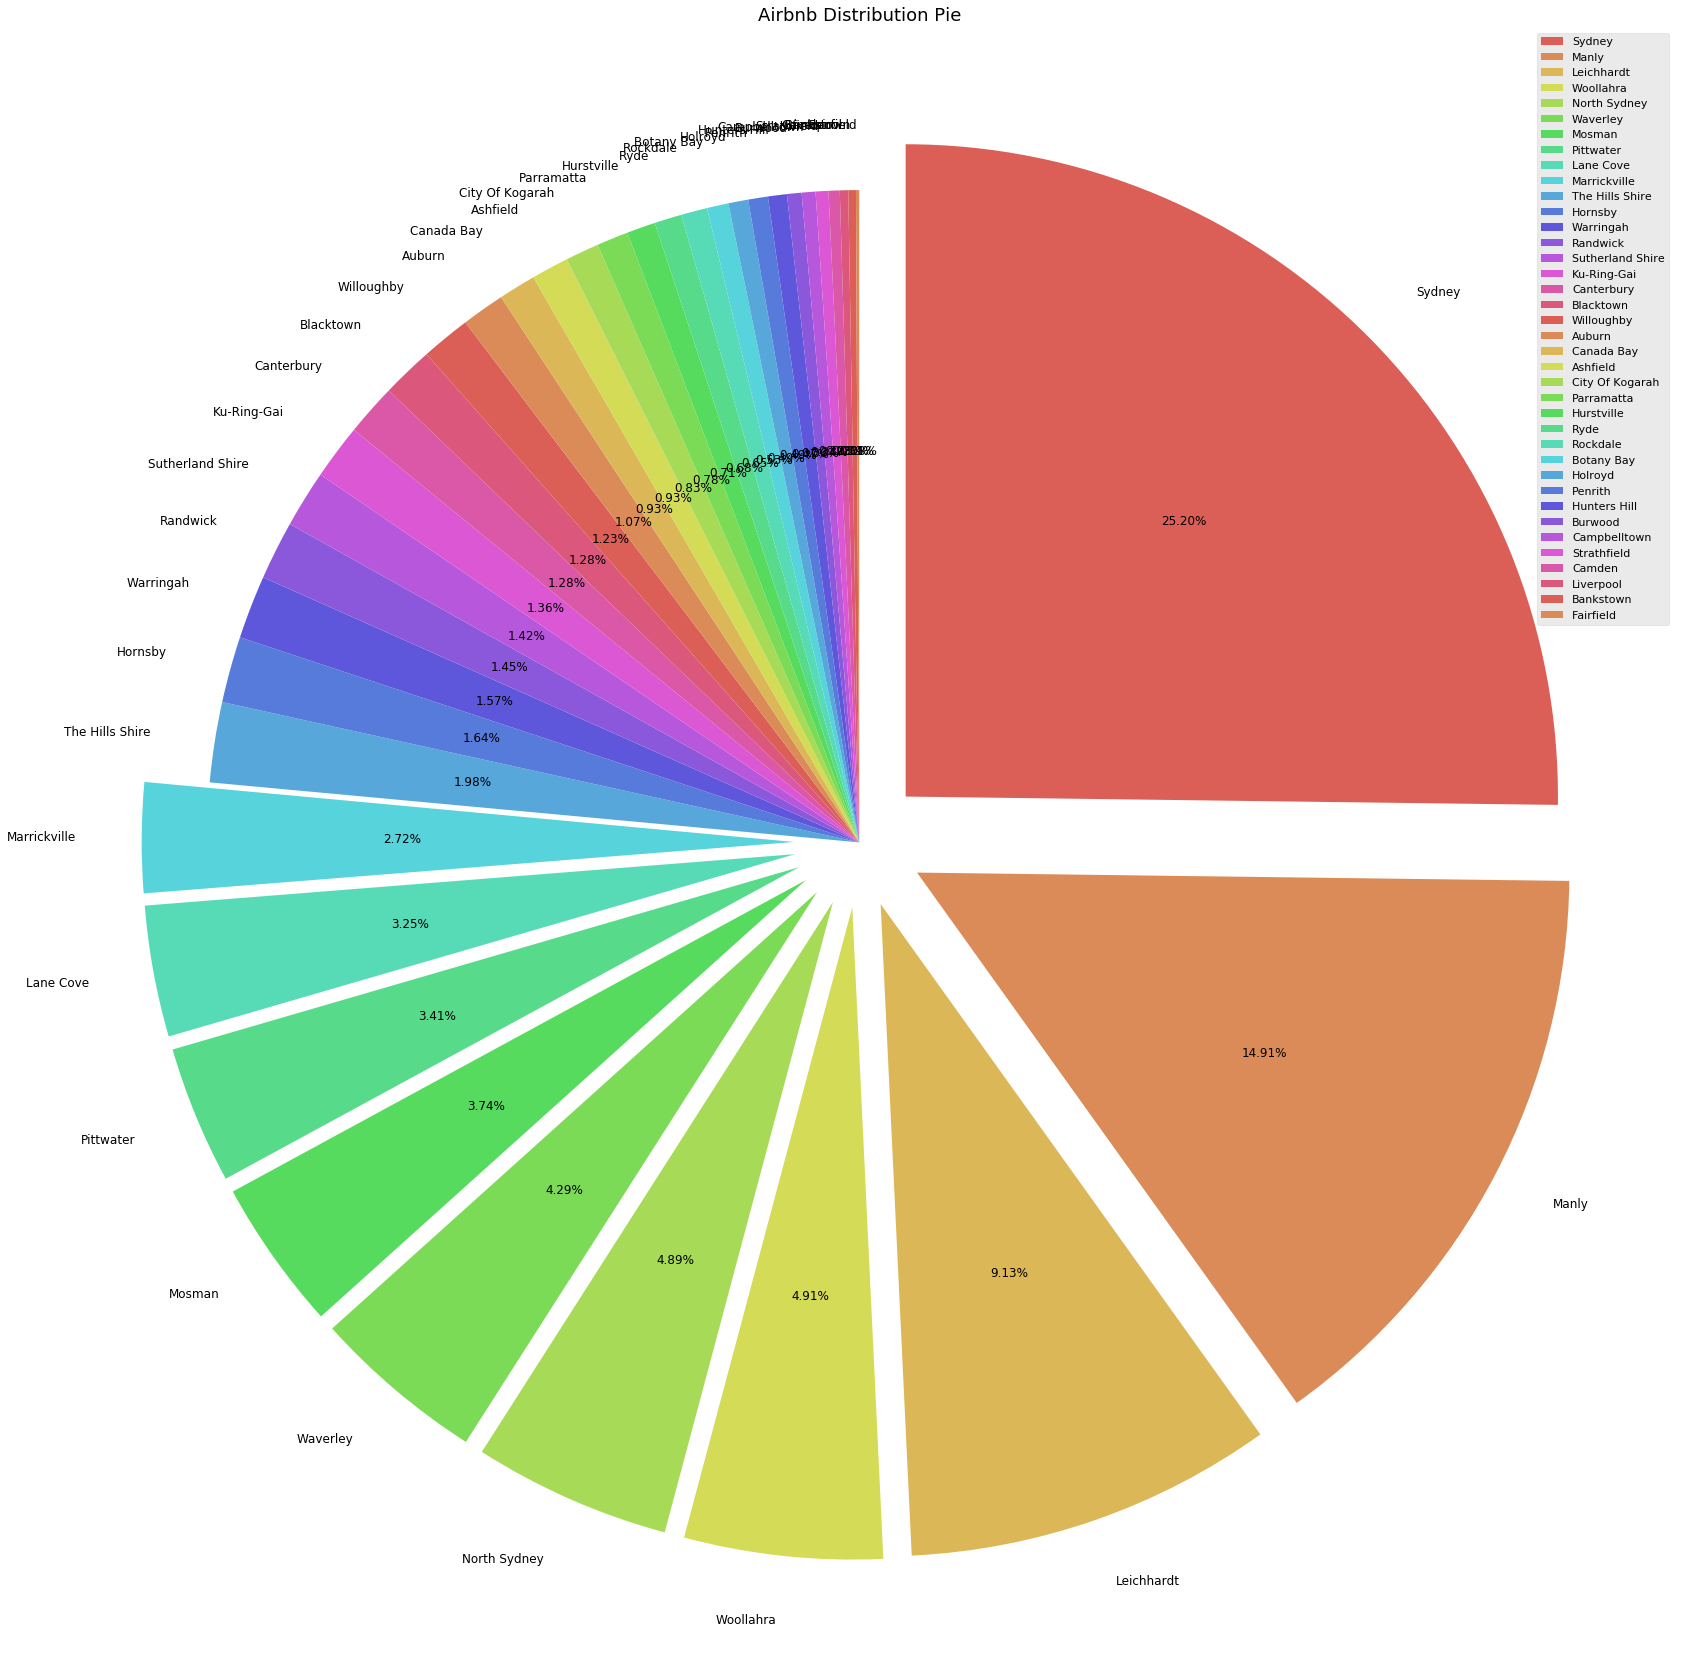

In [24]:
data2 = listings.neighbourhood.value_counts()
label2 = listings.neighbourhood.unique().tolist()
plt.figure(figsize=(30,30))
plt.title('Airbnb Distribution Pie',fontdict={'fontsize':18})
plt.pie(data2,labels=label2,autopct='%.2f%%',explode=explode,startangle=90,
        counterclock=False,textprops={'fontsize':12,'color':'black'},colors=sns.color_palette('hls',n_colors=18))
plt.legend(loc='upper right',shadow=False,fontsize=11)

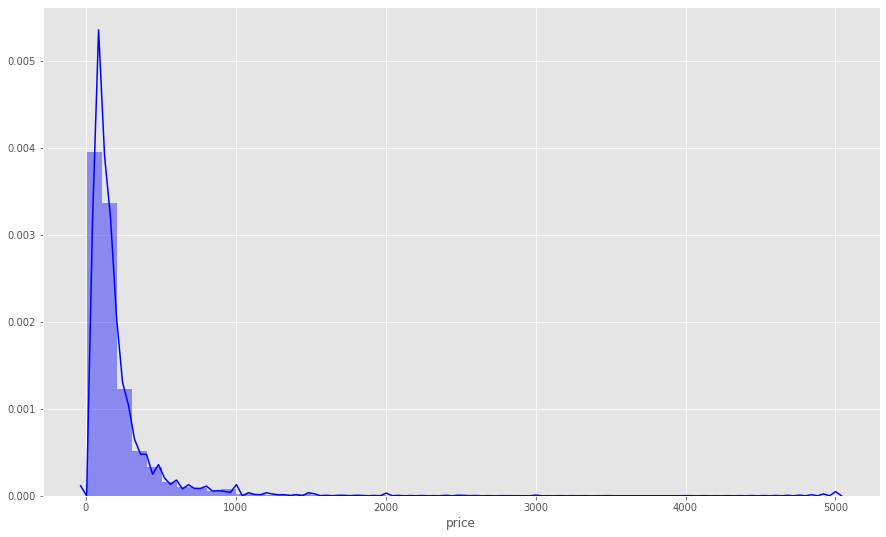

In [25]:
#Price distribution
sns.distplot(listings['price'],color='b')

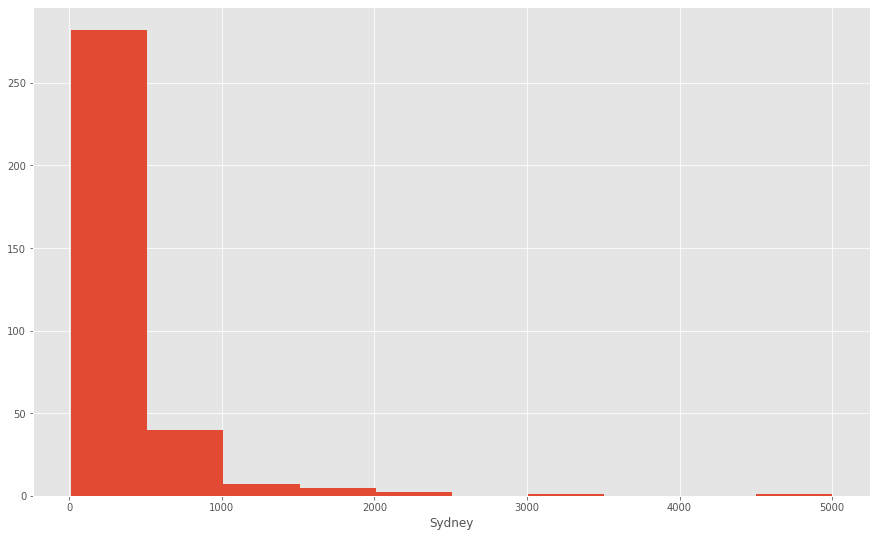

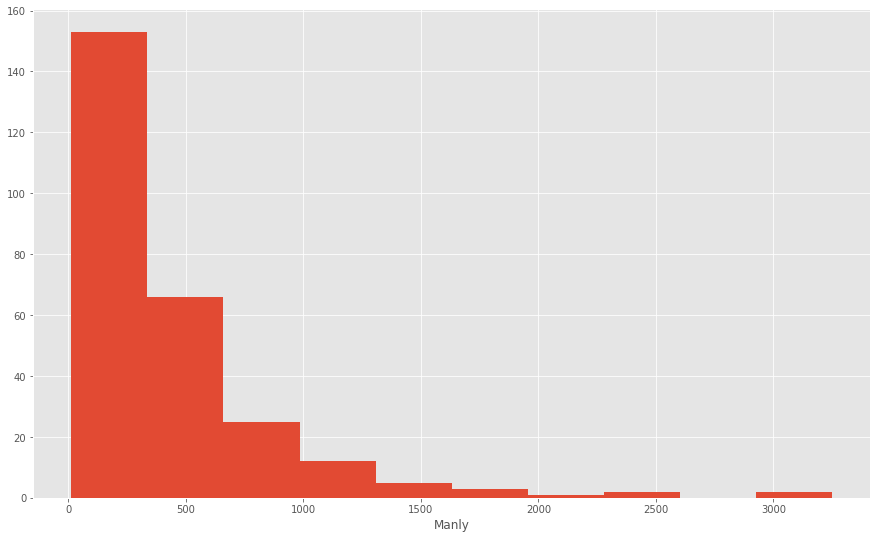

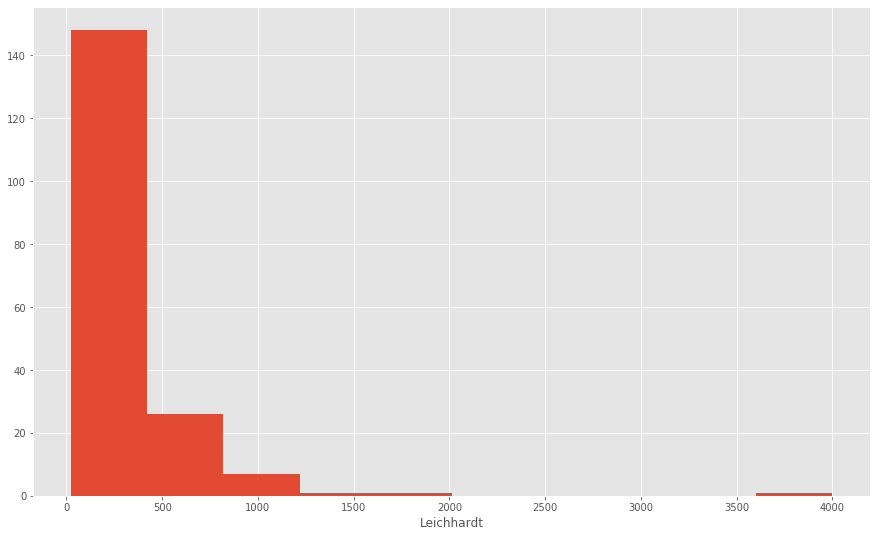

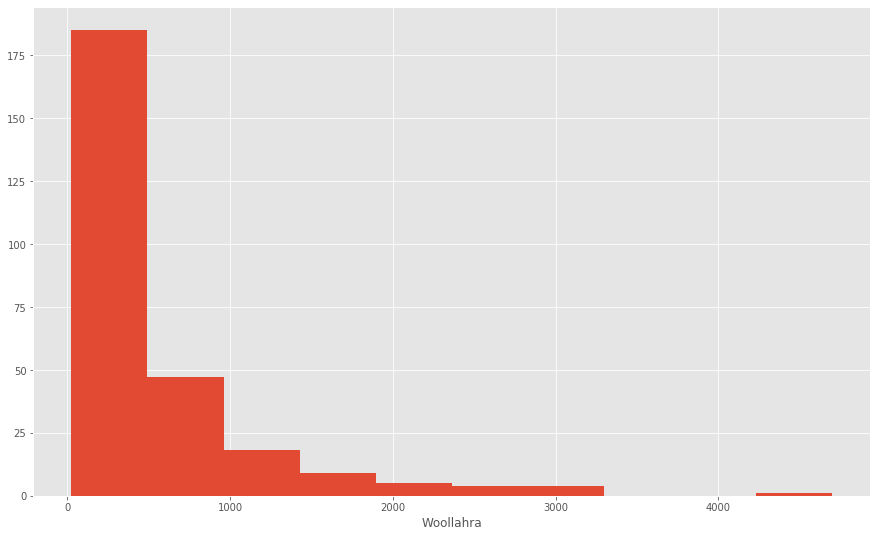

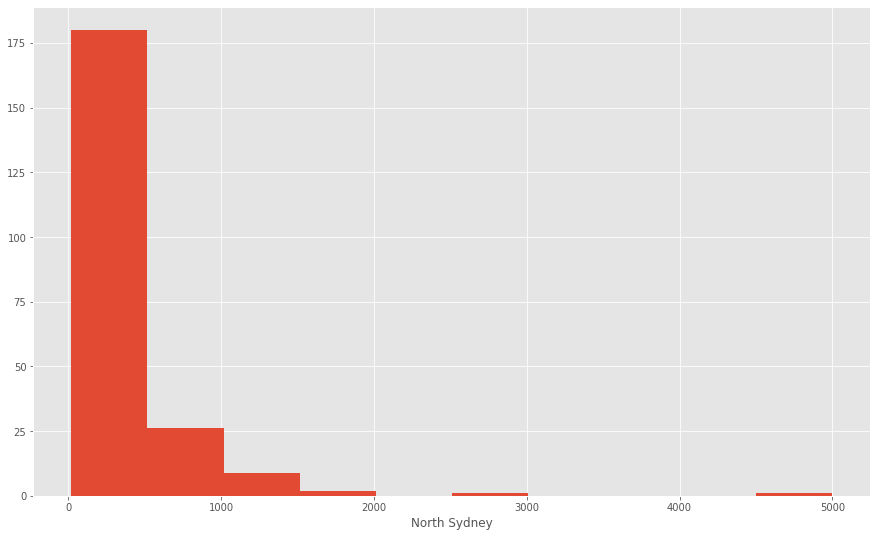

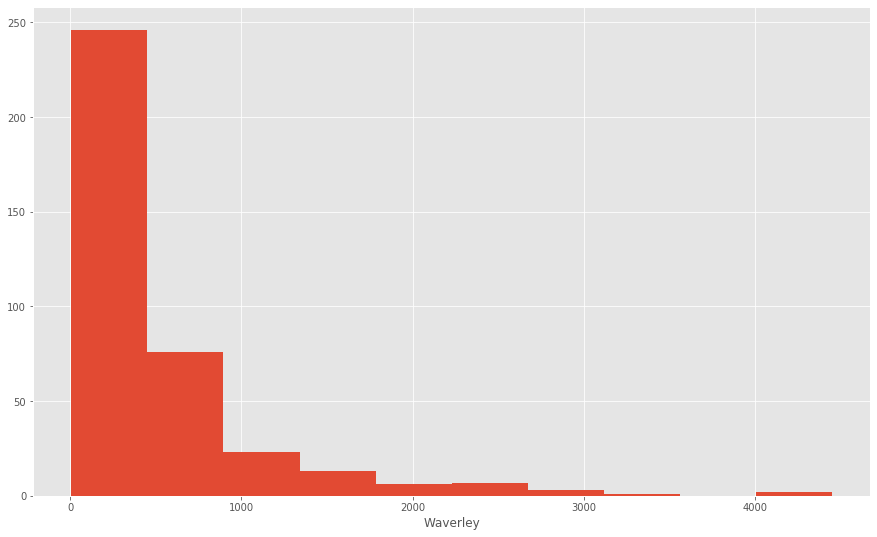

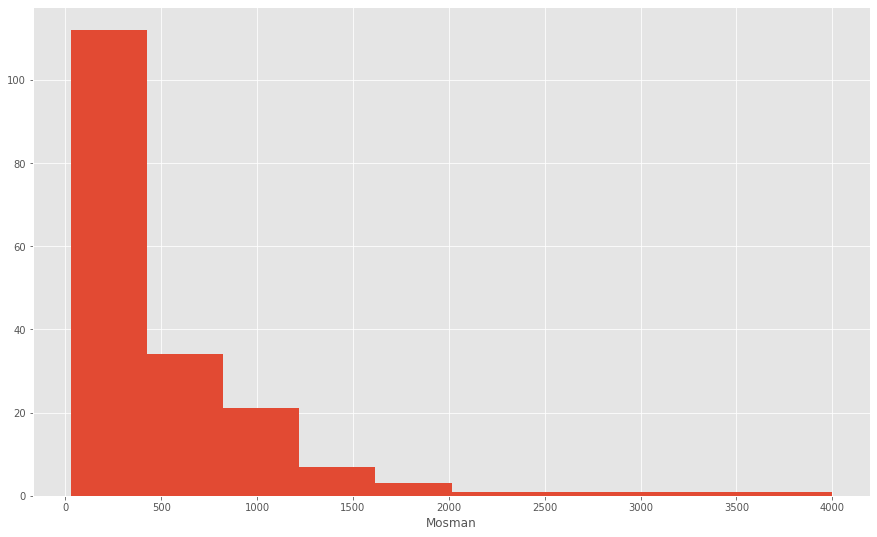

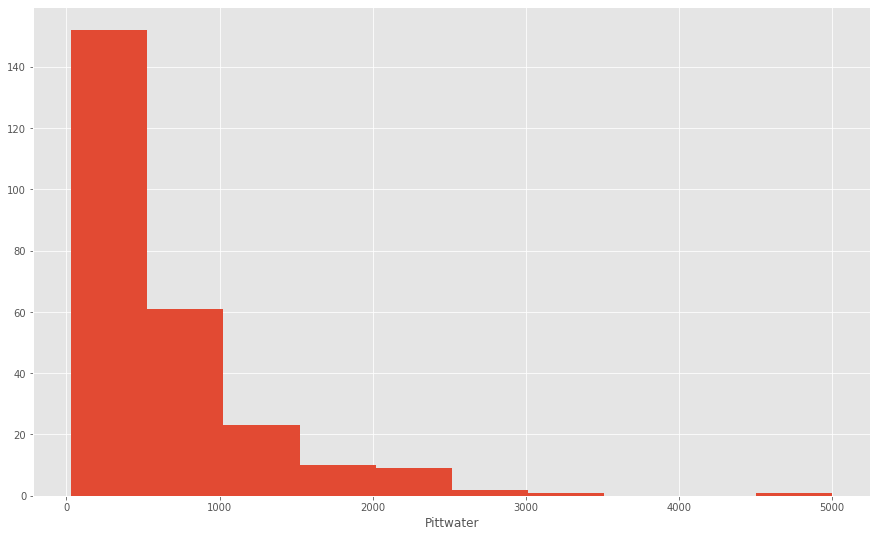

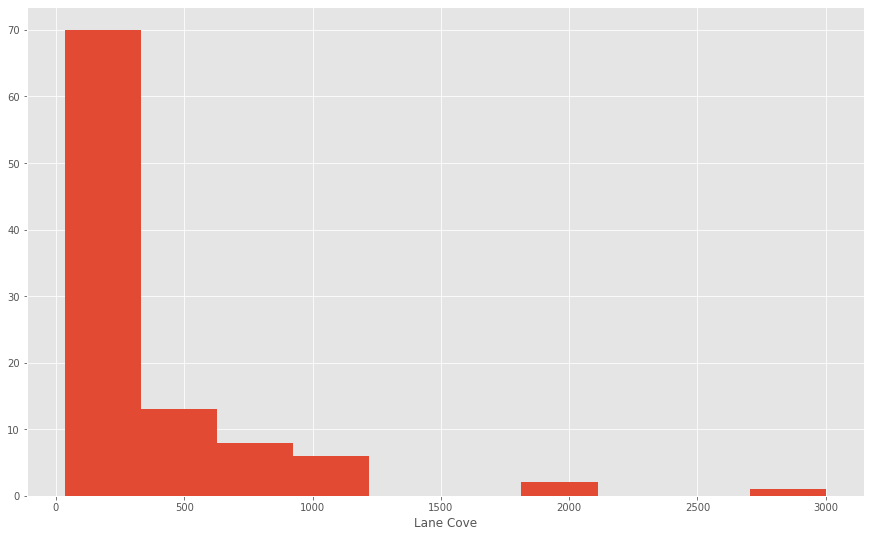

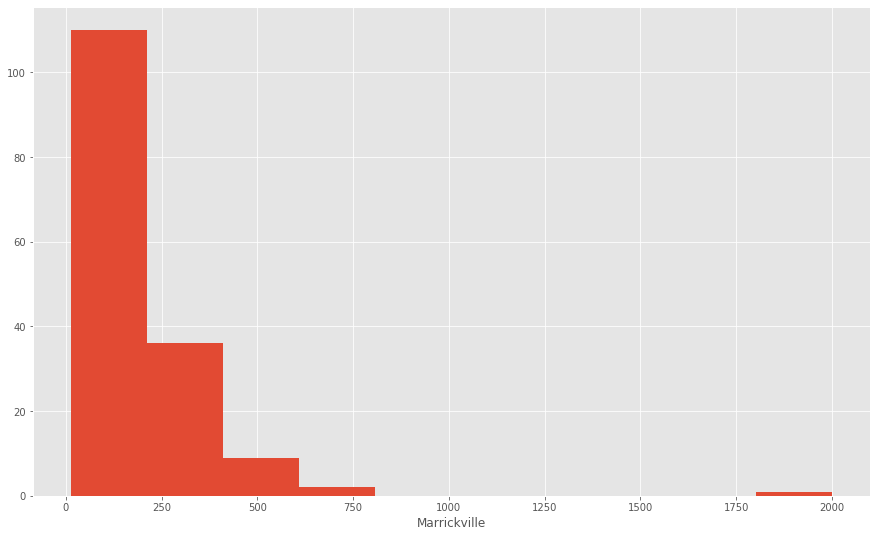

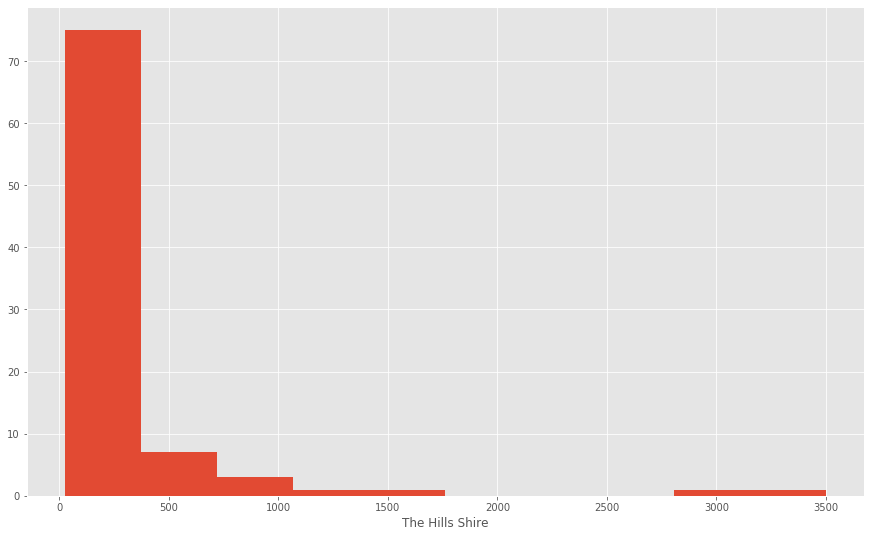

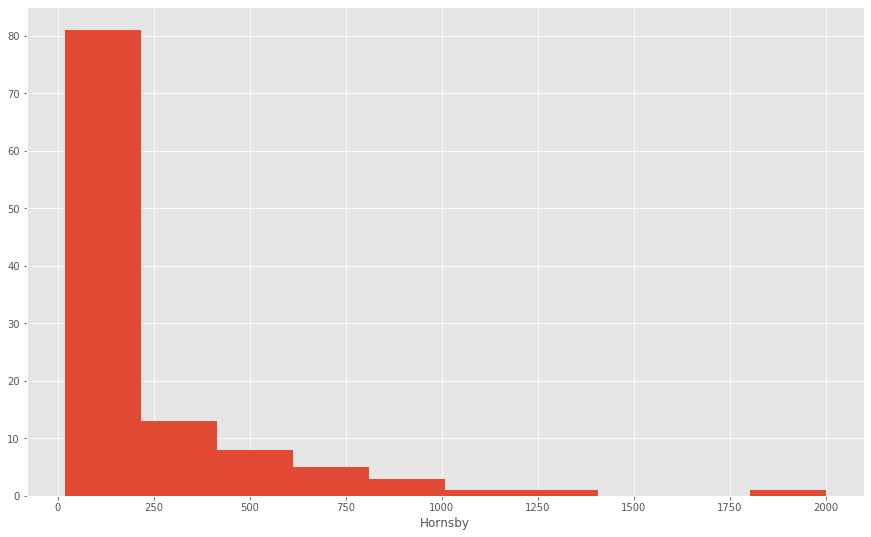

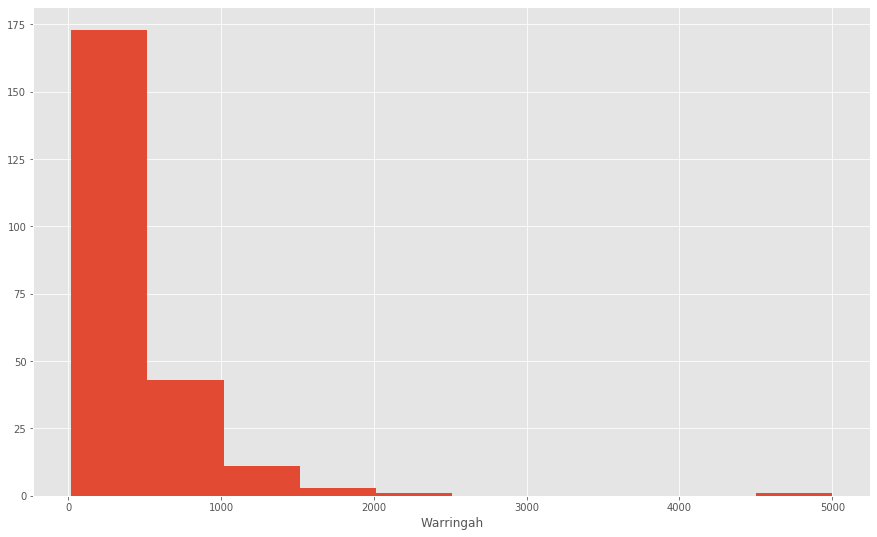

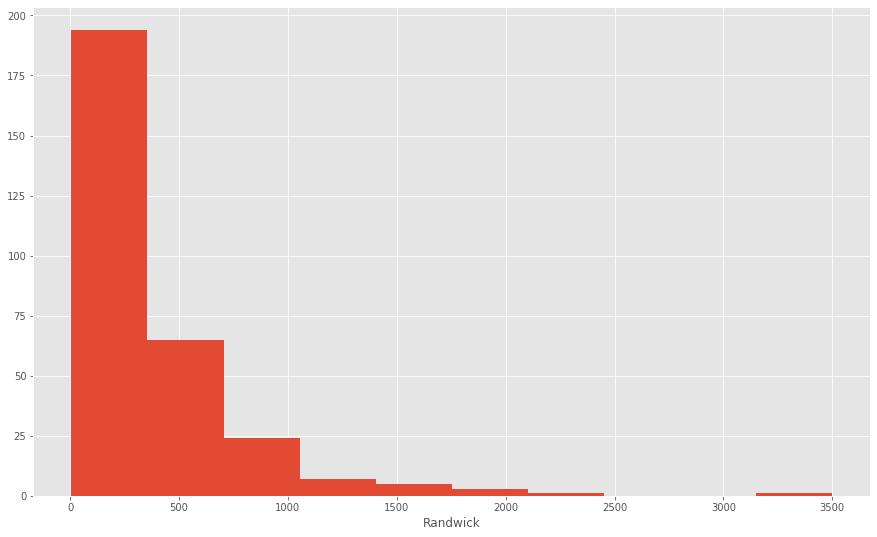

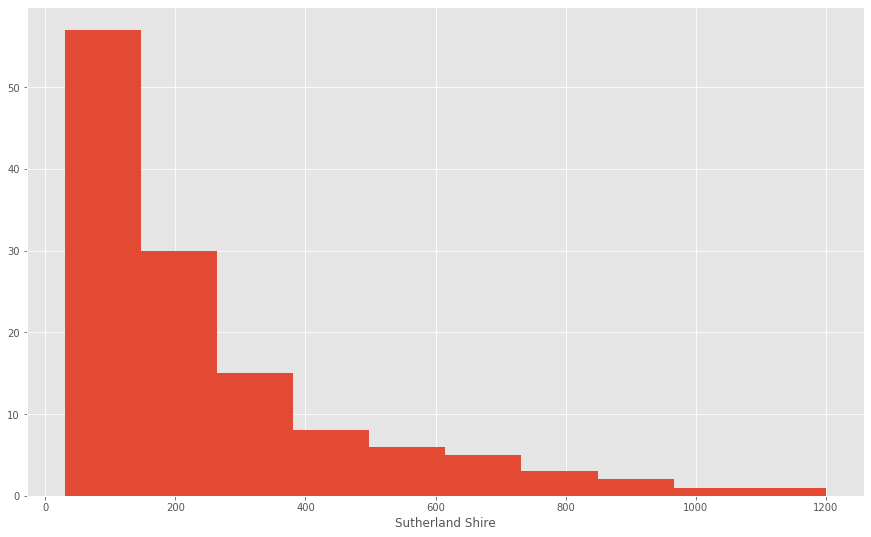

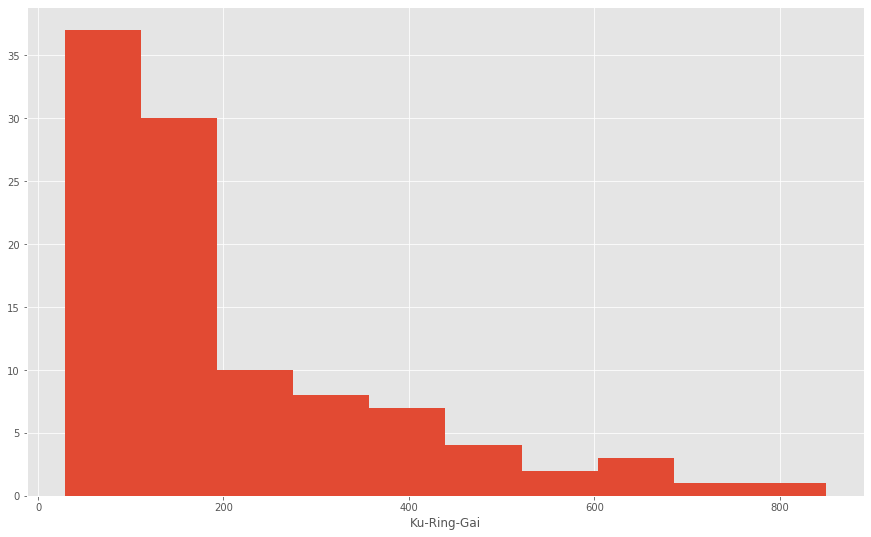

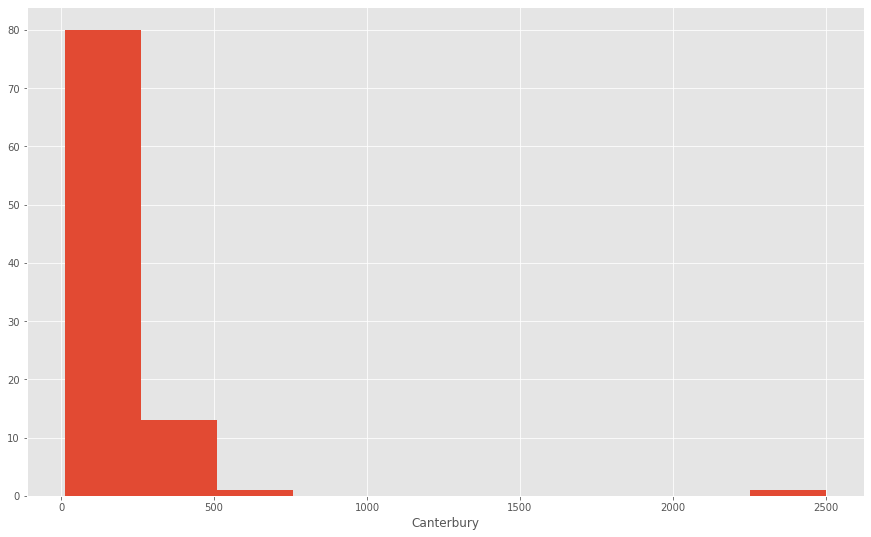

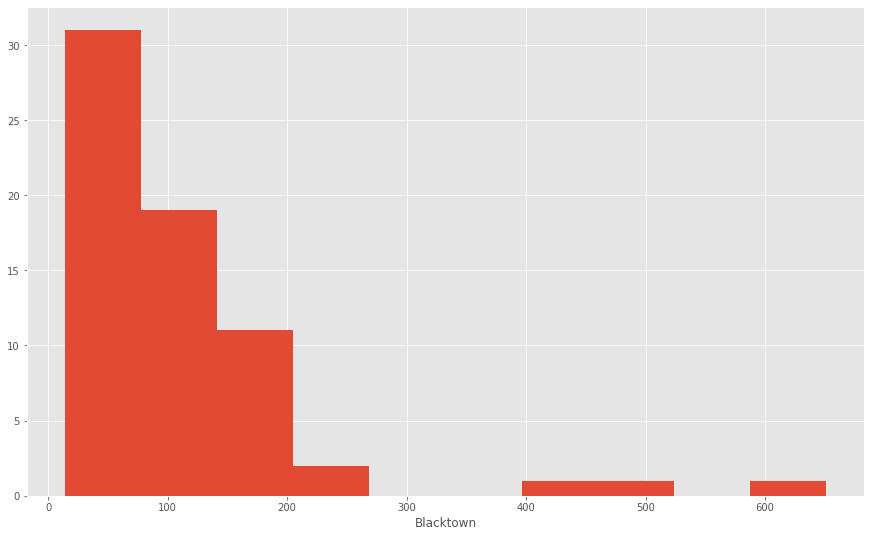

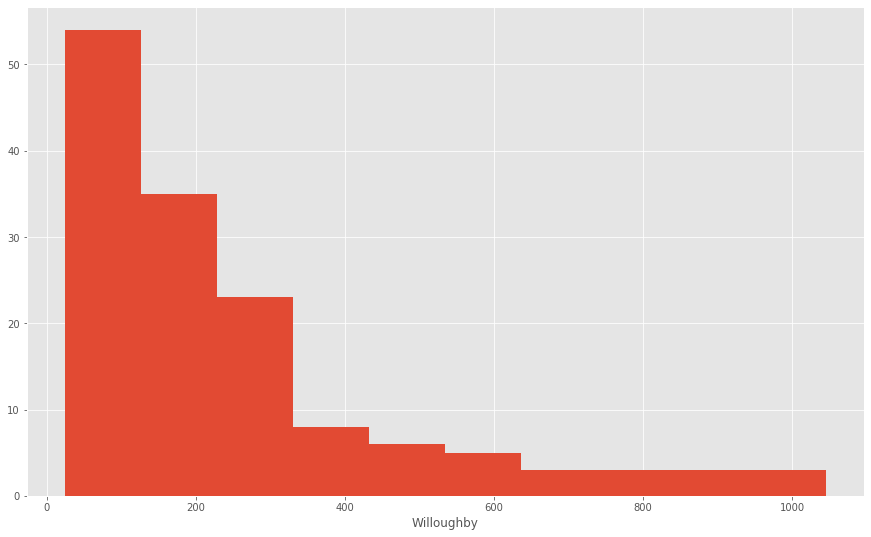

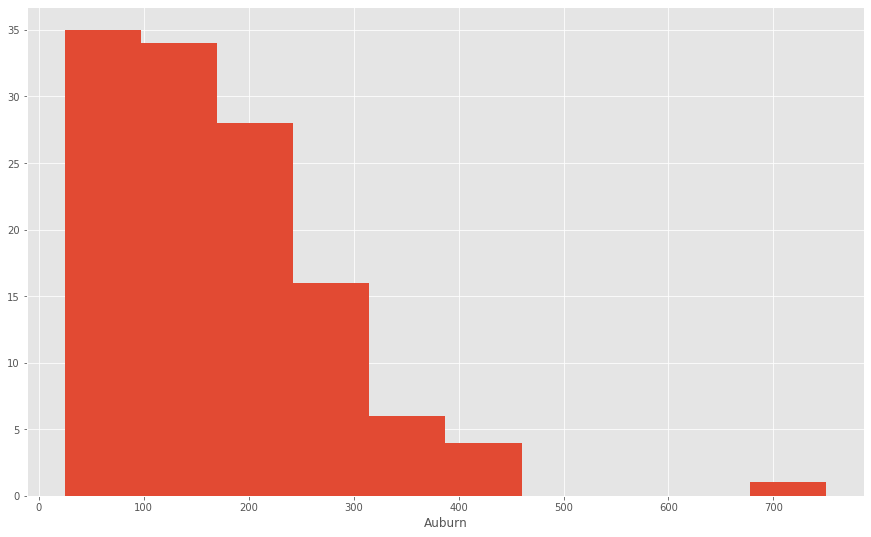

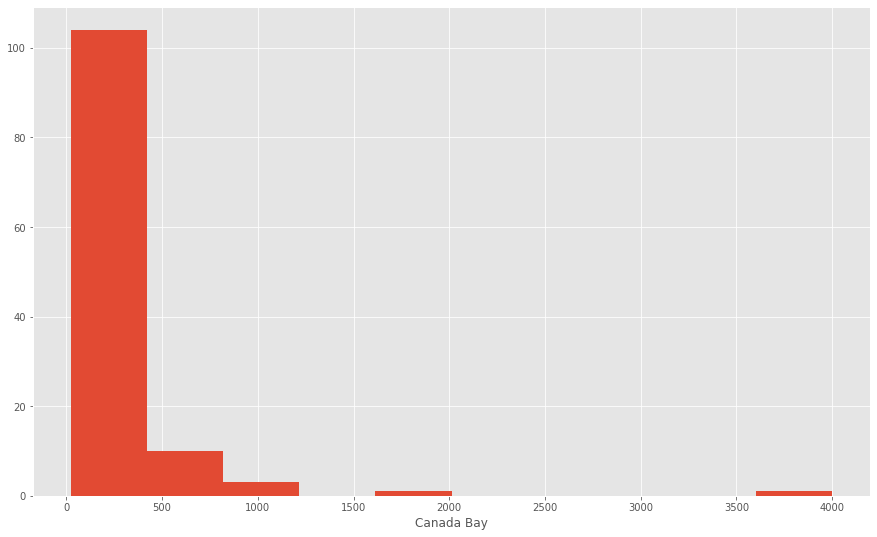

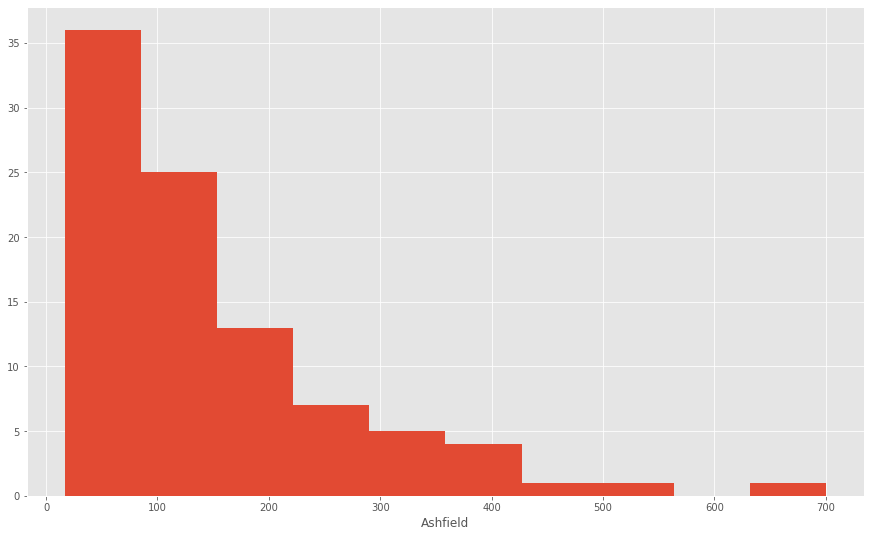

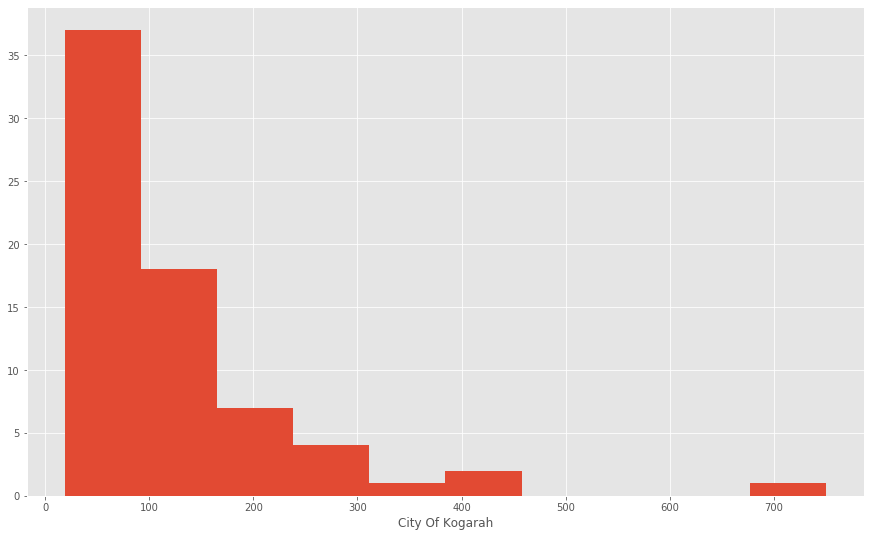

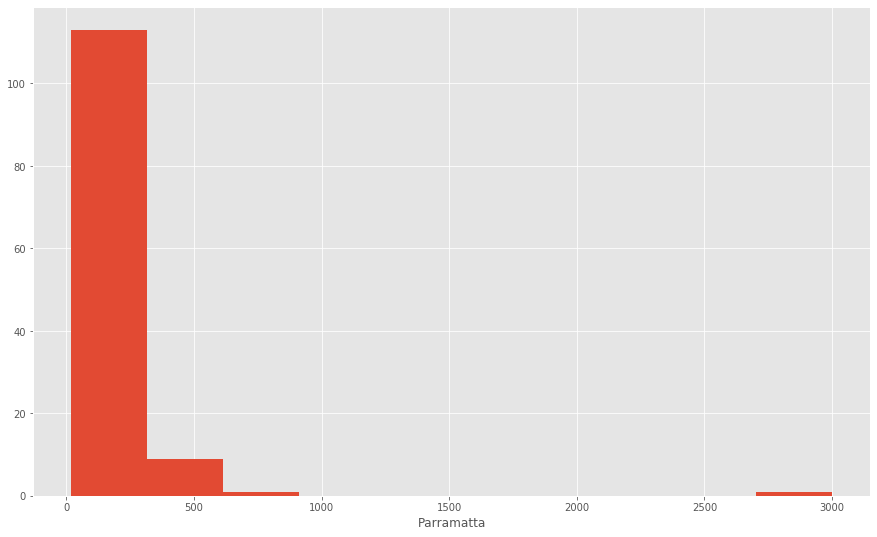

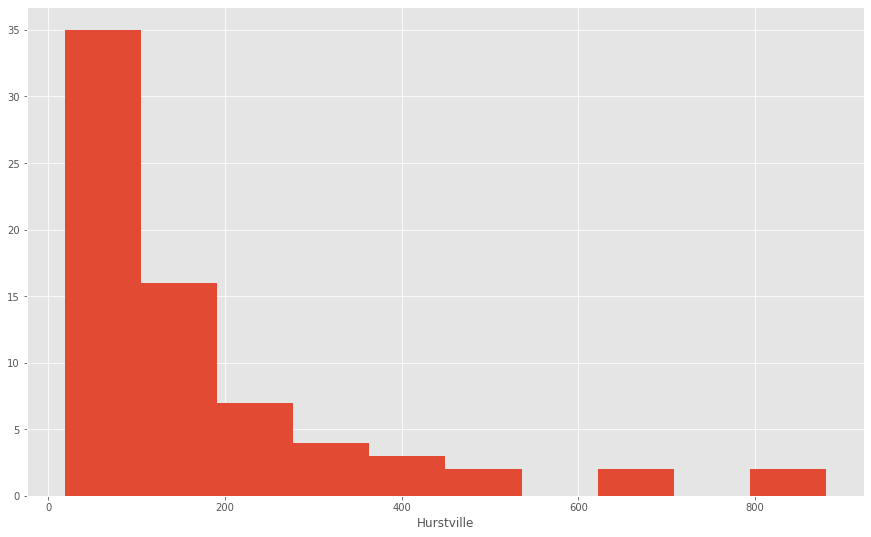

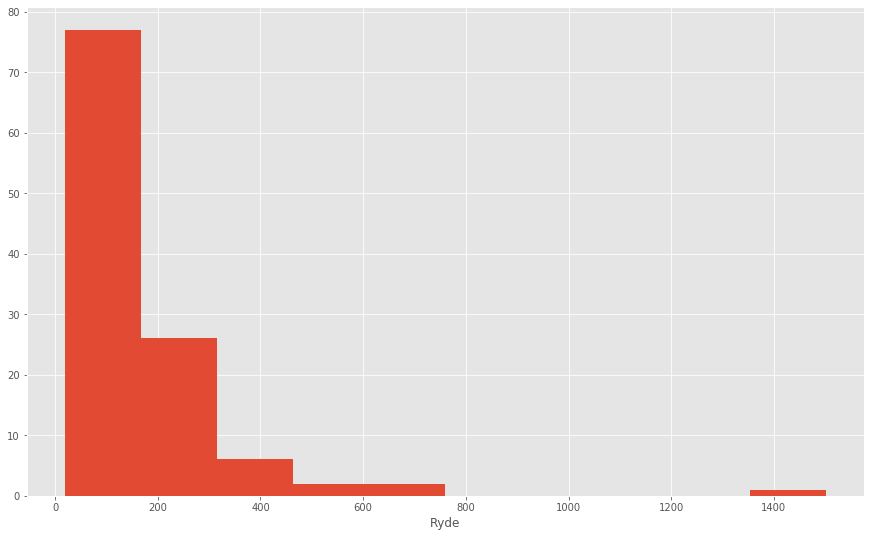

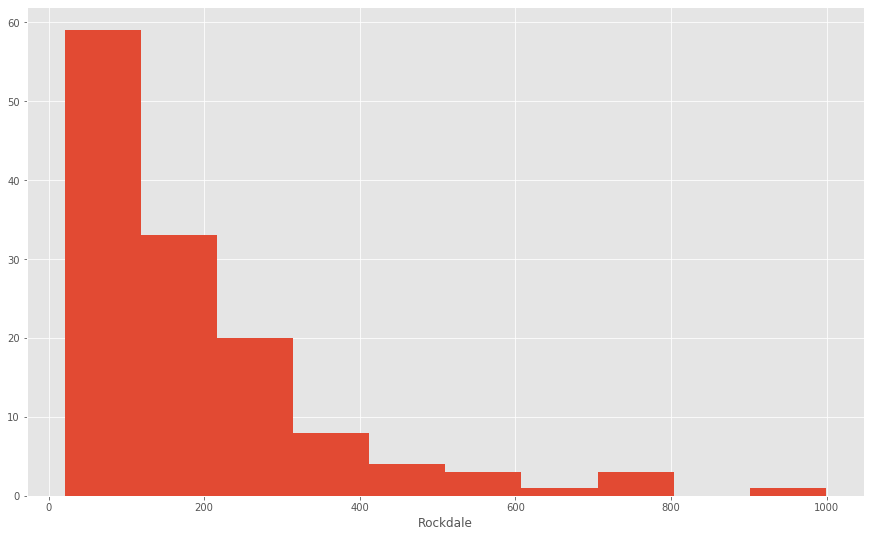

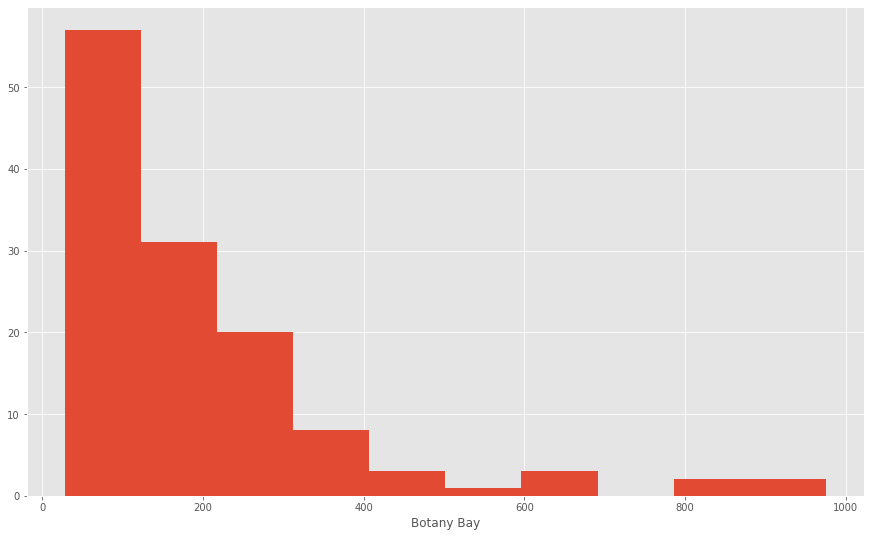

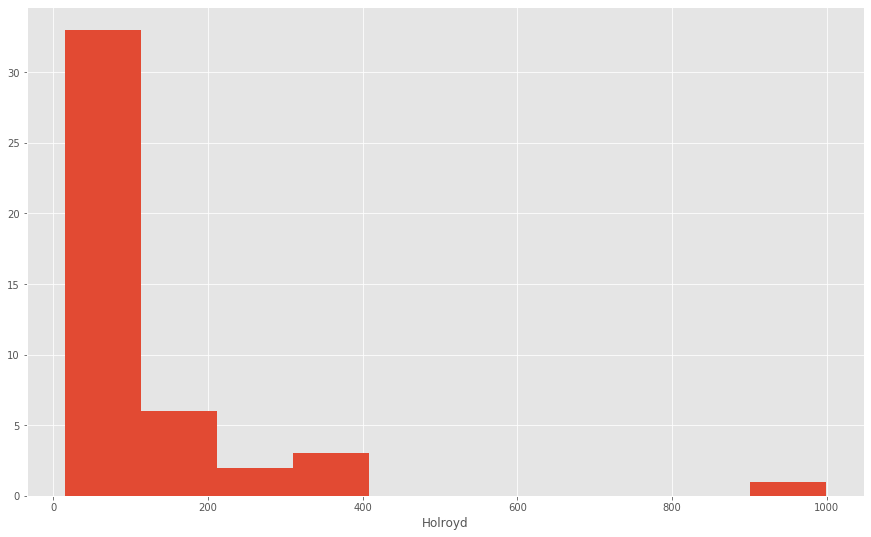

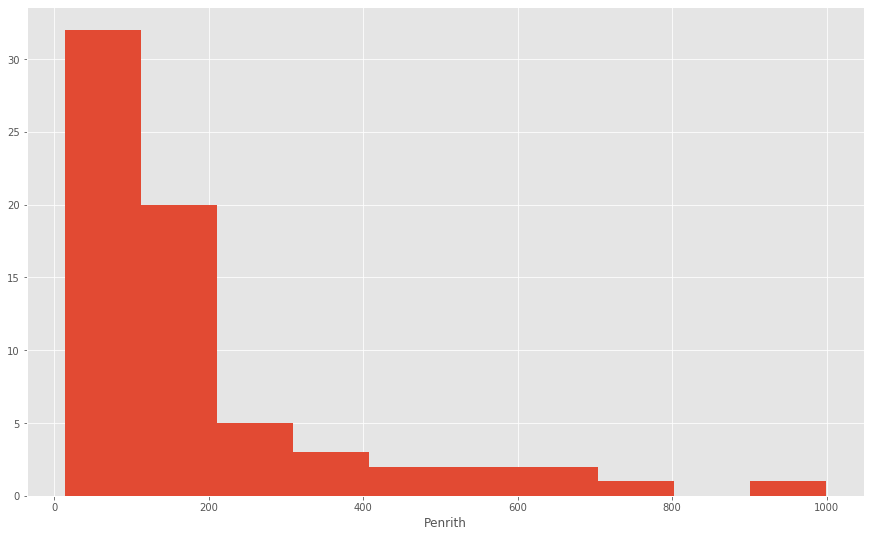

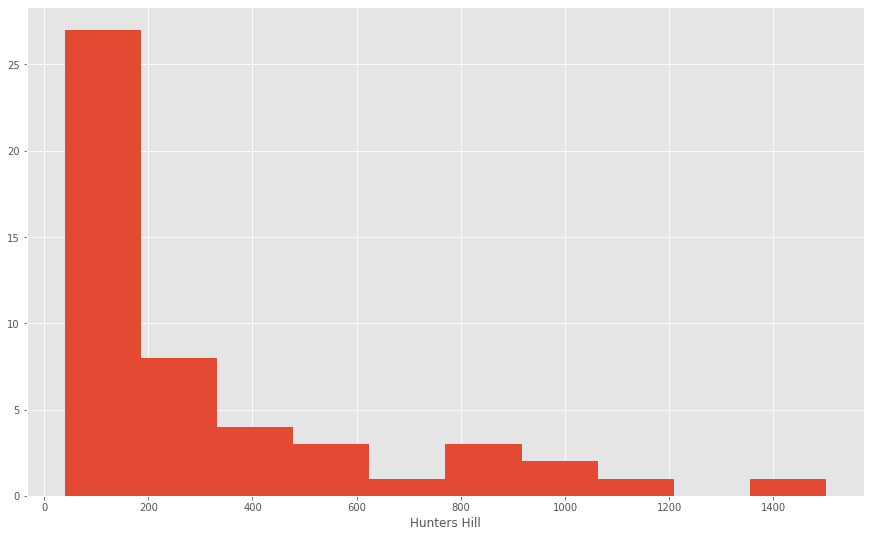

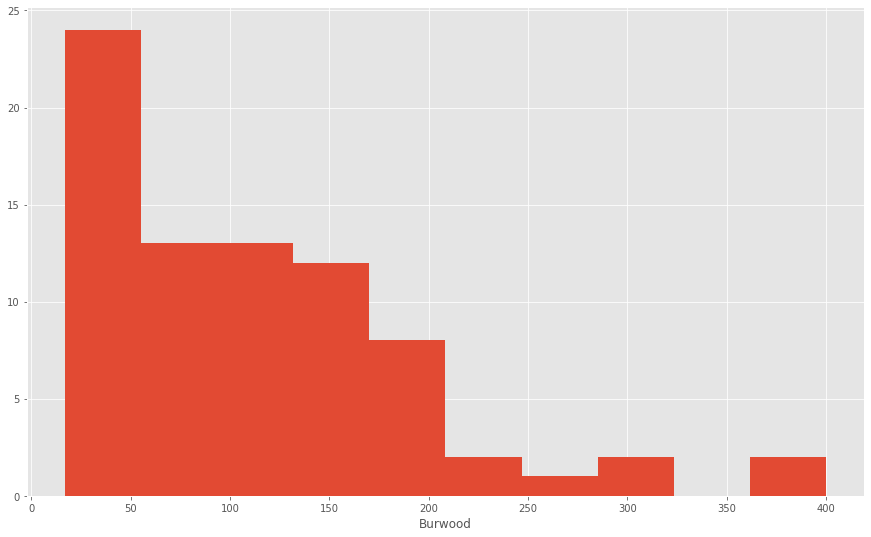

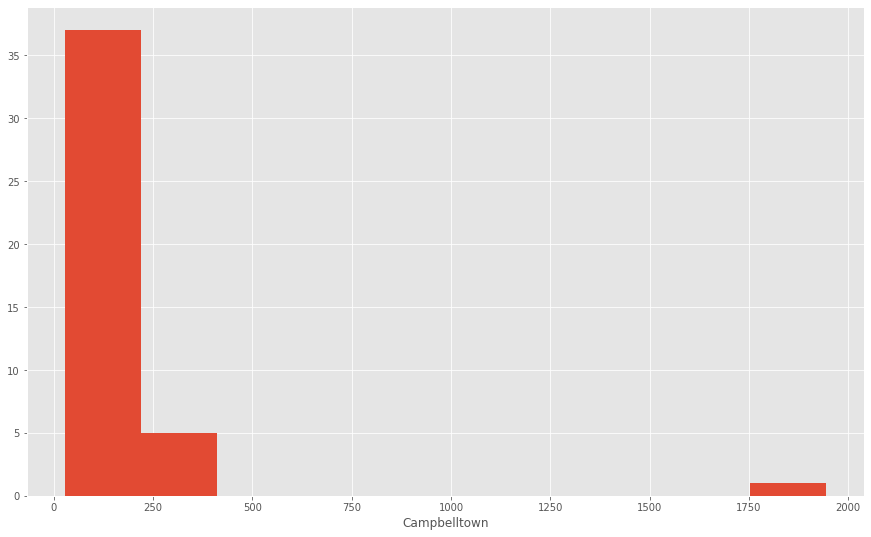

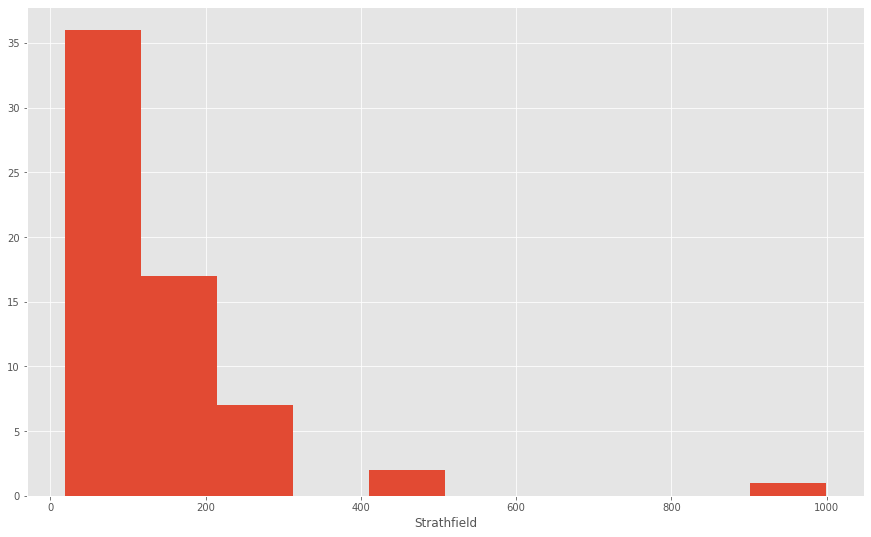

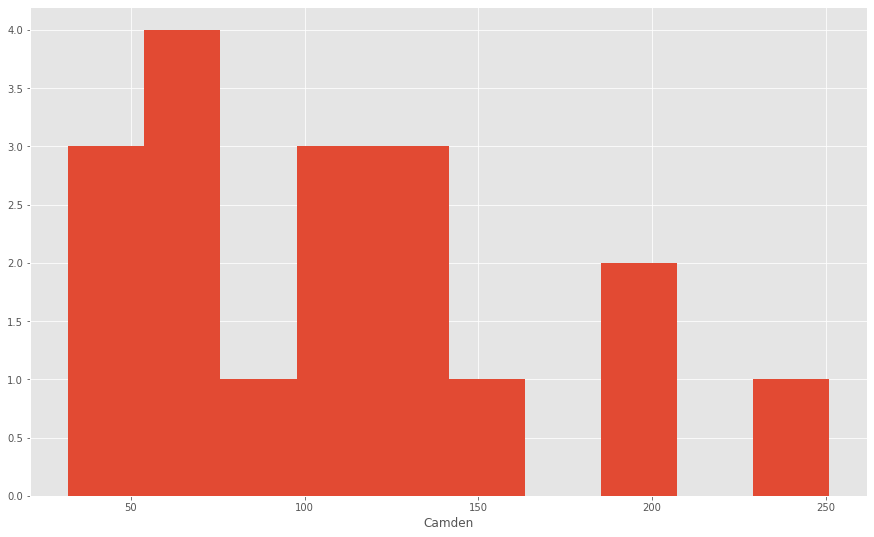

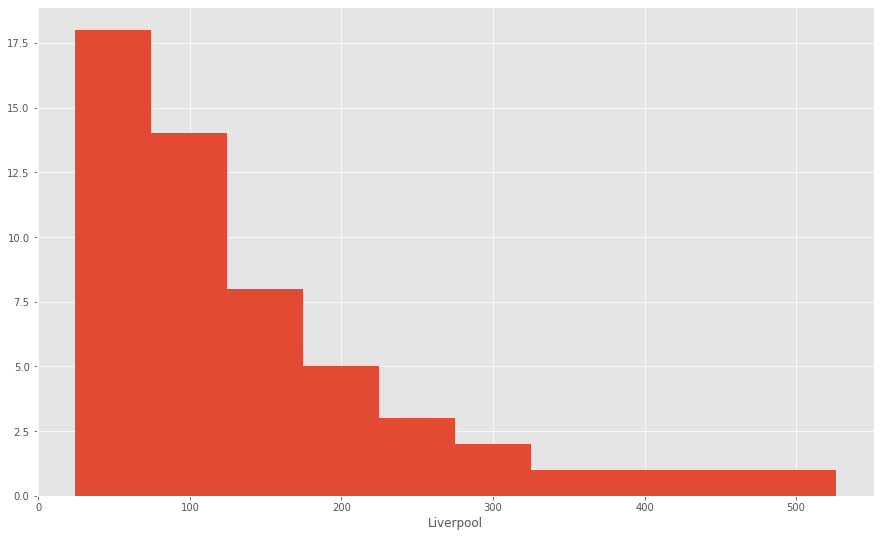

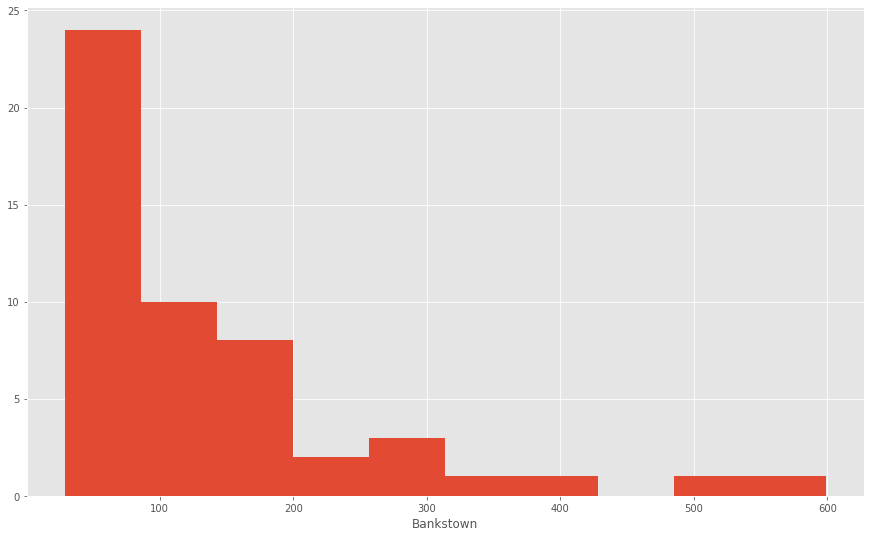

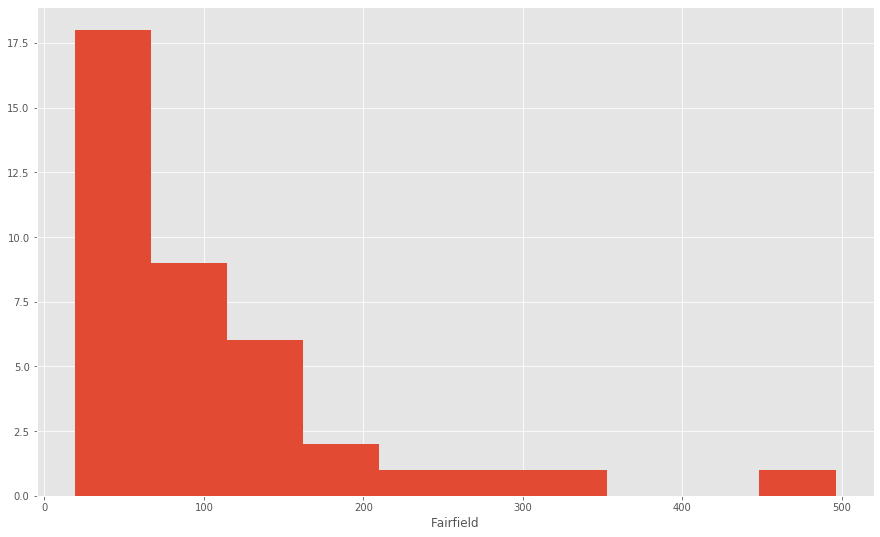

In [26]:
a = listings[['neighbourhood','price']].groupby(['neighbourhood','price']).count().reset_index()
for i in label2:
    plt.hist(a[a['neighbourhood']==i].price)
    plt.xlabel(i)
    plt.show()

In [27]:
listings[['price','neighbourhood']].groupby('neighbourhood').quantile(0.75).price.tolist()

[130.0,
 184.0,
 100.0,
 100.0,
 136.0,
 134.0,
 120.0,
 195.0,
 170.0,
 125.0,
 114.5,
 100.0,
 89.0,
 155.0,
 350.0,
 150.0,
 180.0,
 239.0,
 251.0,
 195.0,
 337.5,
 150.0,
 450.0,
 215.0,
 136.0,
 162.75,
 673.0,
 199.0,
 155.0,
 140.0,
 115.0,
 251.0,
 199.0,
 150.0,
 350.0,
 260.0,
 199.0,
 300.0]

In [28]:
b = pd.DataFrame(listings['neighbourhood'].unique(),columns=['Neighbourhood'])
b['Max price'] = listings[['price','neighbourhood']].groupby('neighbourhood').max().price.tolist()
b['Min price'] = listings[['price','neighbourhood']].groupby('neighbourhood').min().price.tolist()
b['Medium price'] = listings[['price','neighbourhood']].groupby('neighbourhood').median().price.tolist()
b['25%Price'] = listings[['price','neighbourhood']].groupby('neighbourhood').quantile(0.25).price.tolist()
b['75%Price'] = listings[['price','neighbourhood']].groupby('neighbourhood').quantile(0.75).price.tolist()
b['Quartile'] = np.array(listings[['price','neighbourhood']].groupby('neighbourhood').quantile(0.75).price.tolist()) - np.array(listings[['price','neighbourhood']].groupby('neighbourhood').quantile(0.25).price.tolist())
b

Neighbourhood  Max price  Min price  Medium price  25%Price  75%Price  \
0             Sydney      700.0       17.0          80.0      50.0    130.00   
1              Manly      750.0       25.0         136.0      79.0    184.00   
2         Leichhardt      599.0       29.0          70.0      46.0    100.00   
3          Woollahra      651.0       14.0          61.0      46.0    100.00   
4       North Sydney      975.0       28.0          82.0      60.0    136.00   
5           Waverley      400.0       17.0          79.0      50.0    134.00   
6             Mosman      251.0       32.0          76.0      60.0    120.00   
7          Pittwater     1944.0       28.0          84.0      50.0    195.00   
8          Lane Cove     3999.0       25.0         111.0      71.0    170.00   
9       Marrickville     2500.0       12.0          80.0      50.0    125.00   
10   The Hills Shire      750.0       19.0          71.0      55.0    114.50   
11           Hornsby      496.0       19.0          57.5      37.0    100.00   
12         Warringah      999.0       15.0          60.0      42.0     89.00   
13          Randwick     2000.0       19.0          90.0      50.0    155.00   
14  Sutherland Shire     1501.0       40.0         150.0      80.0    350.00   
15       Ku-Ring-Gai      880.0       19.0          79.0      50.0    150.00   
16        Canterbury      850.0       29.0         109.0      71.0    180.00   
17         Blacktown     3000.0       35.0         109.0      75.0    239.00   
18        Willoughby     3999.0       25.0         150.0      89.0    251.00   
19            Auburn      526.0       24.0          98.0      55.0    195.00   
20        Canada Bay     3250.0       12.0         197.0     115.0    337.50   
21          Ashfield     2000.0       14.0          90.0      60.0    150.00   
22   City Of Kogarah     3999.0       30.0         199.0     120.0    450.00   
23        Parramatta     5000.0       19.0         145.0      90.0    215.00   
24        Hurstville     3000.0       19.0          80.0      50.0    136.00   
25              Ryde      999.0       14.0         120.0      64.0    162.75   
26          Rockdale     5000.0       32.0         350.0     170.0    673.00   
27        Botany Bay     3500.0        6.0         120.0      71.0    199.00   
28           Holroyd      999.0       21.0          90.0      55.0    155.00   
29           Penrith     1501.0       19.0          84.0      55.0    140.00   
30      Hunters Hill      999.0       19.0          76.0      54.0    115.00   
31           Burwood     1200.0       30.0         134.0      90.0    251.00   
32      Campbelltown     5000.0       14.0         138.0      89.0    199.00   
33       Strathfield     3500.0       25.0          84.0      55.0    150.00   
34            Camden     5000.0       21.0         159.0      96.0    350.00   
35         Liverpool     4451.0        6.0         150.0      90.0    260.00   
36         Bankstown     1045.0       24.0         125.0      75.0    199.00   
37         Fairfield     4700.0       24.0         165.0      98.0    300.00   

    Quartile  
0      80.00  
1     105.00  
2      54.00  
3      54.00  
4      76.00  
5      84.00  
6      60.00  
7     145.00  
8      99.00  
9      75.00  
10     59.50  
11     63.00  
12     47.00  
13    105.00  
14    270.00  
15    100.00  
16    109.00  
17    164.00  
18    162.00  
19    140.00  
20    222.50  
21     90.00  
22    330.00  
23    125.00  
24     86.00  
25     98.75  
26    503.00  
27    128.00  
28    100.00  
29     85.00  
30     61.00  
31    161.00  
32    110.00  
33     95.00  
34    254.00  
35    170.00  
36    124.00  
37    202.00

In [29]:
avg_review = listings['number_of_reviews'].quantile(0.9)
avg_month_review = listings['reviews_per_month'].quantile(0.9)
print(avg_review)
print(avg_month_review)

35.0
3.2


In [30]:
popular_house = listings[(listings['number_of_reviews']>avg_review) & (listings['reviews_per_month']>avg_month_review)]
popular_house.sort_values(by=['number_of_reviews','reviews_per_month'],ascending=False).head(10)

id                            listing_url  host_has_profile_pic  \
0         12351     https://www.airbnb.com/rooms/12351                   1.0   
467      898906    https://www.airbnb.com/rooms/898906                   1.0   
5256    7944819   https://www.airbnb.com/rooms/7944819                   1.0   
144      389876    https://www.airbnb.com/rooms/389876                   1.0   
10088  12954762  https://www.airbnb.com/rooms/12954762                   1.0   
3786    5751561   https://www.airbnb.com/rooms/5751561                   1.0   
79       256569    https://www.airbnb.com/rooms/256569                   1.0   
280      725541    https://www.airbnb.com/rooms/725541                   1.0   
417      846696    https://www.airbnb.com/rooms/846696                   1.0   
1273    2239063   https://www.airbnb.com/rooms/2239063                   1.0   

       host_since neighbourhood_cleansed  neighbourhood_group_cleansed  \
0      2009-05-14                 Sydney                           NaN   
467    2013-01-22              Pittwater                           NaN   
5256   2011-12-31             Botany Bay                           NaN   
144    2012-03-17                 Sydney                           NaN   
10088  2016-05-09               Rockdale                           NaN   
3786   2011-06-11                 Sydney                           NaN   
79     2011-10-29               Waverley                           NaN   
280    2012-03-17                 Sydney                           NaN   
417    2012-12-16                 Sydney                           NaN   
1273   2012-08-07                 Sydney                           NaN   

       host_is_superhost                                        description  \
0                    0.0  Come stay with Vinh & Stuart (Awarded as one o...   
467                  0.0  A quiet cabin in my backyard frequented by bir...   
5256                 1.0  My home  is spacious, which is 1 or 2 stops on...   
144                  1.0  Welcome to The United Nations of Redfern, righ...   
10088                1.0  Private room in a newly renovated 2 Bedroom gr...   
3786                 1.0  Stylish, relaxing downstairs space on lower fl...   
79                   0.0  Sandstone apartment Beaches Coastal walks Exce...   
280                  1.0  Wake up in an epic, oversized bed with downtow...   
417                  0.0  This budget accommodation option is better tha...   
1273                 1.0  A converted warehouse, this New York style apa...   

        latitude   longitude  ...  guests_included minimum_nights  \
0     -33.865153  151.191896  ...                2              2   
467   -33.621014  151.336106  ...                2              1   
5256  -33.921516  151.190089  ...                1              1   
144   -33.889261  151.201722  ...                2              1   
10088 -33.937002  151.152735  ...                1              1   
3786  -33.901891  151.181319  ...                1              1   
79    -33.895861  151.271684  ...                1              2   
280   -33.892097  151.200071  ...                2              1   
417   -33.879612  151.215928  ...                2              3   
1273  -33.873524  151.216849  ...                1              1   

      host_response_rate  host_acceptance_rate  instant_bookable  \
0                   100%                   NaN                 0   
467                 100%                   NaN                 1   
5256                100%                   NaN                 1   
144                 100%                   NaN                 1   
10088               100%                   NaN                 1   
3786                100%                   NaN                 0   
79                  100%                   NaN                 1   
280                 100%                   NaN                 1   
417                 100%                   NaN                 1   
1273   

In [31]:
reviews_top90 = popular_house.sort_values(by=['number_of_reviews','reviews_per_month'],ascending=False)
reviews_top90.head()

id                            listing_url  host_has_profile_pic  \
0         12351     https://www.airbnb.com/rooms/12351                   1.0   
467      898906    https://www.airbnb.com/rooms/898906                   1.0   
5256    7944819   https://www.airbnb.com/rooms/7944819                   1.0   
144      389876    https://www.airbnb.com/rooms/389876                   1.0   
10088  12954762  https://www.airbnb.com/rooms/12954762                   1.0   

       host_since neighbourhood_cleansed  neighbourhood_group_cleansed  \
0      2009-05-14                 Sydney                           NaN   
467    2013-01-22              Pittwater                           NaN   
5256   2011-12-31             Botany Bay                           NaN   
144    2012-03-17                 Sydney                           NaN   
10088  2016-05-09               Rockdale                           NaN   

       host_is_superhost                                        description  \
0                    0.0  Come stay with Vinh & Stuart (Awarded as one o...   
467                  0.0  A quiet cabin in my backyard frequented by bir...   
5256                 1.0  My home  is spacious, which is 1 or 2 stops on...   
144                  1.0  Welcome to The United Nations of Redfern, righ...   
10088                1.0  Private room in a newly renovated 2 Bedroom gr...   

        latitude   longitude  ...  guests_included minimum_nights  \
0     -33.865153  151.191896  ...                2              2   
467   -33.621014  151.336106  ...                2              1   
5256  -33.921516  151.190089  ...                1              1   
144   -33.889261  151.201722  ...                2              1   
10088 -33.937002  151.152735  ...                1              1   

      host_response_rate  host_acceptance_rate  instant_bookable  \
0                   100%                   NaN                 0   
467                 100%                   NaN                 1   
5256                100%                   NaN                 1   
144                 100%                   NaN                 1   
10088               100%                   NaN                 1   

       is_business_travel_ready          cancellation_policy availability_365  \
0                             0  strict_14_with_grace_period              187   
467                           0                     moderate              297   
5256                          0                     moderate              279   
144                           0                     moderate              208   
10088                         0                     moderate               25   

                                           geometry  neighbourhood  
0      POINT (151.1918958878082 -33.86515254975741)         Sydney  
467    POINT (151.3361061799203 -33.62101416436514)      Pittwater  
5256   POINT (151.1900887696215 -33.92151566072942)     Botany Bay  
144    POINT (151.2017217712867 -33.88926107078935)         Sydney  
10088  POINT (151.1527351718912 -33.93700239332635)       Rockdale  

[5 rows x 43 columns]

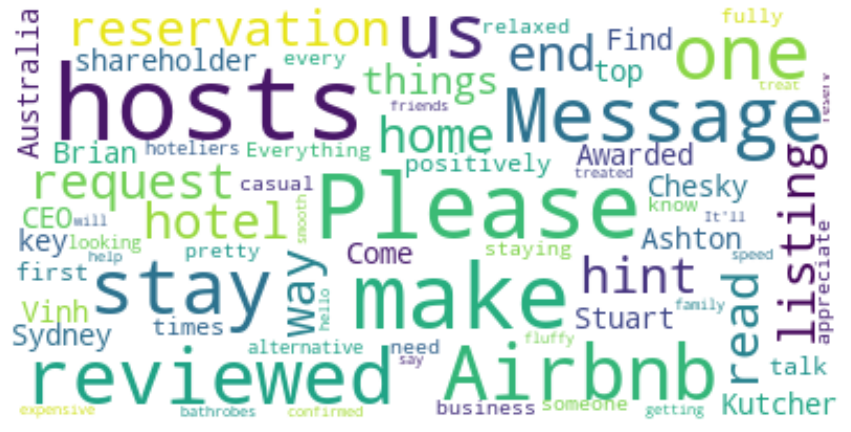

In [32]:
#Most commonly used word in host description
from wordcloud import WordCloud
text1 = reviews_top90.description[0]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text1)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 1336722 words in the combination of all description.


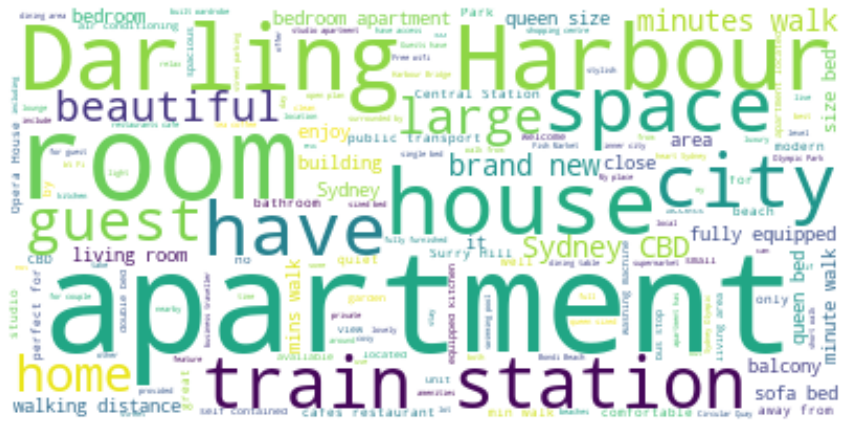

In [33]:
text1 = " ".join(description for description in reviews_top90.description)
print ("There are {} words in the combination of all description.".format(len(text1)))

from nltk.corpus import stopwords
stopwords=["Airbnb", "Please", "a", "one", "it","and","there","is","in","the","to","of","on","or","this","with","you"
          ,"we","are","which","just","also","all","as","at","that","but","two","our","will","be","it","very","your",
          "an","end"]

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

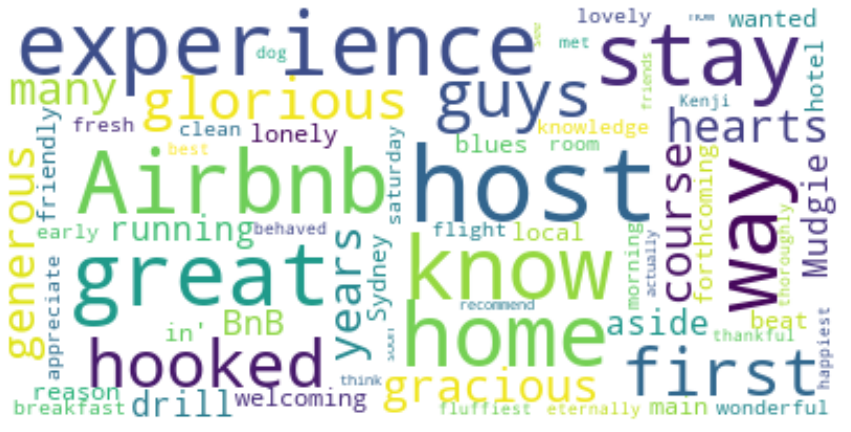

In [34]:
#Most commonly used word in customer reviews
from wordcloud import WordCloud
text2 = reviews.comments[0]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text2)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Price prediction modelling

In [35]:
%matplotlib inline
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter


LISTINGSFILE = 'listings_dec18.csv'
cols = ['price',
        'accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'property_type',
        'cancellation_policy',
        'instant_bookable',
        'reviews_per_month',
        'number_of_reviews',
        'availability_30',
        'availability_60',
        'availability_90',
        'review_scores_rating',
        'calculated_host_listings_count',
        'cleaning_fee',
        'guests_included',
        'extra_people','minimum_nights',
        'maximum_nights'
        ]
df = pd.read_csv(LISTINGSFILE, usecols=cols)
df['price'] = df.price.str.replace("\$|,",'').astype(float)
df['extra_people'] = df.extra_people.str.replace("\$|,",'').astype(float)
df['cleaning_fee'] = df.cleaning_fee.str.replace("\$|,",'').astype(float)
#df['extra_people'] = df.extra_people.str.replace("\$|,",'').astype(float)

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

data = df

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [37]:
df = MultiColumnLabelEncoder(columns = ['neighbourhood_cleansed','accommodates','room_type','property_type','cancellation_policy',
        'instant_bookable','beds','calculated_host_listings_count','cleaning_fee','extra_people','minimum_nights',
       'maximum_nights']).fit_transform(data)

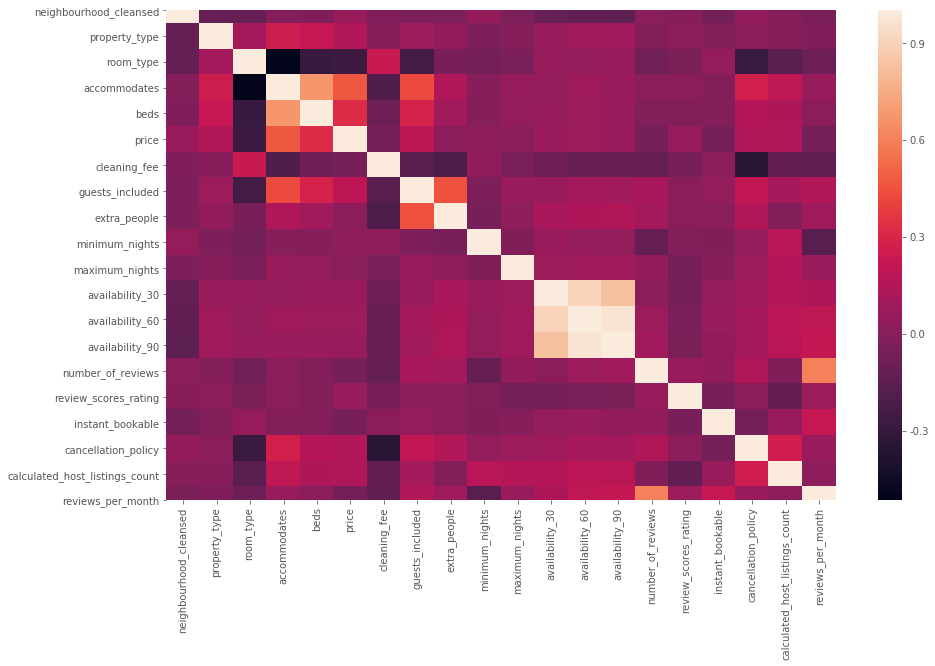

In [38]:
mpl.rcParams['figure.figsize'] = [15,9]
sb.heatmap(df.corr())

/Users/joanna/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joanna/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


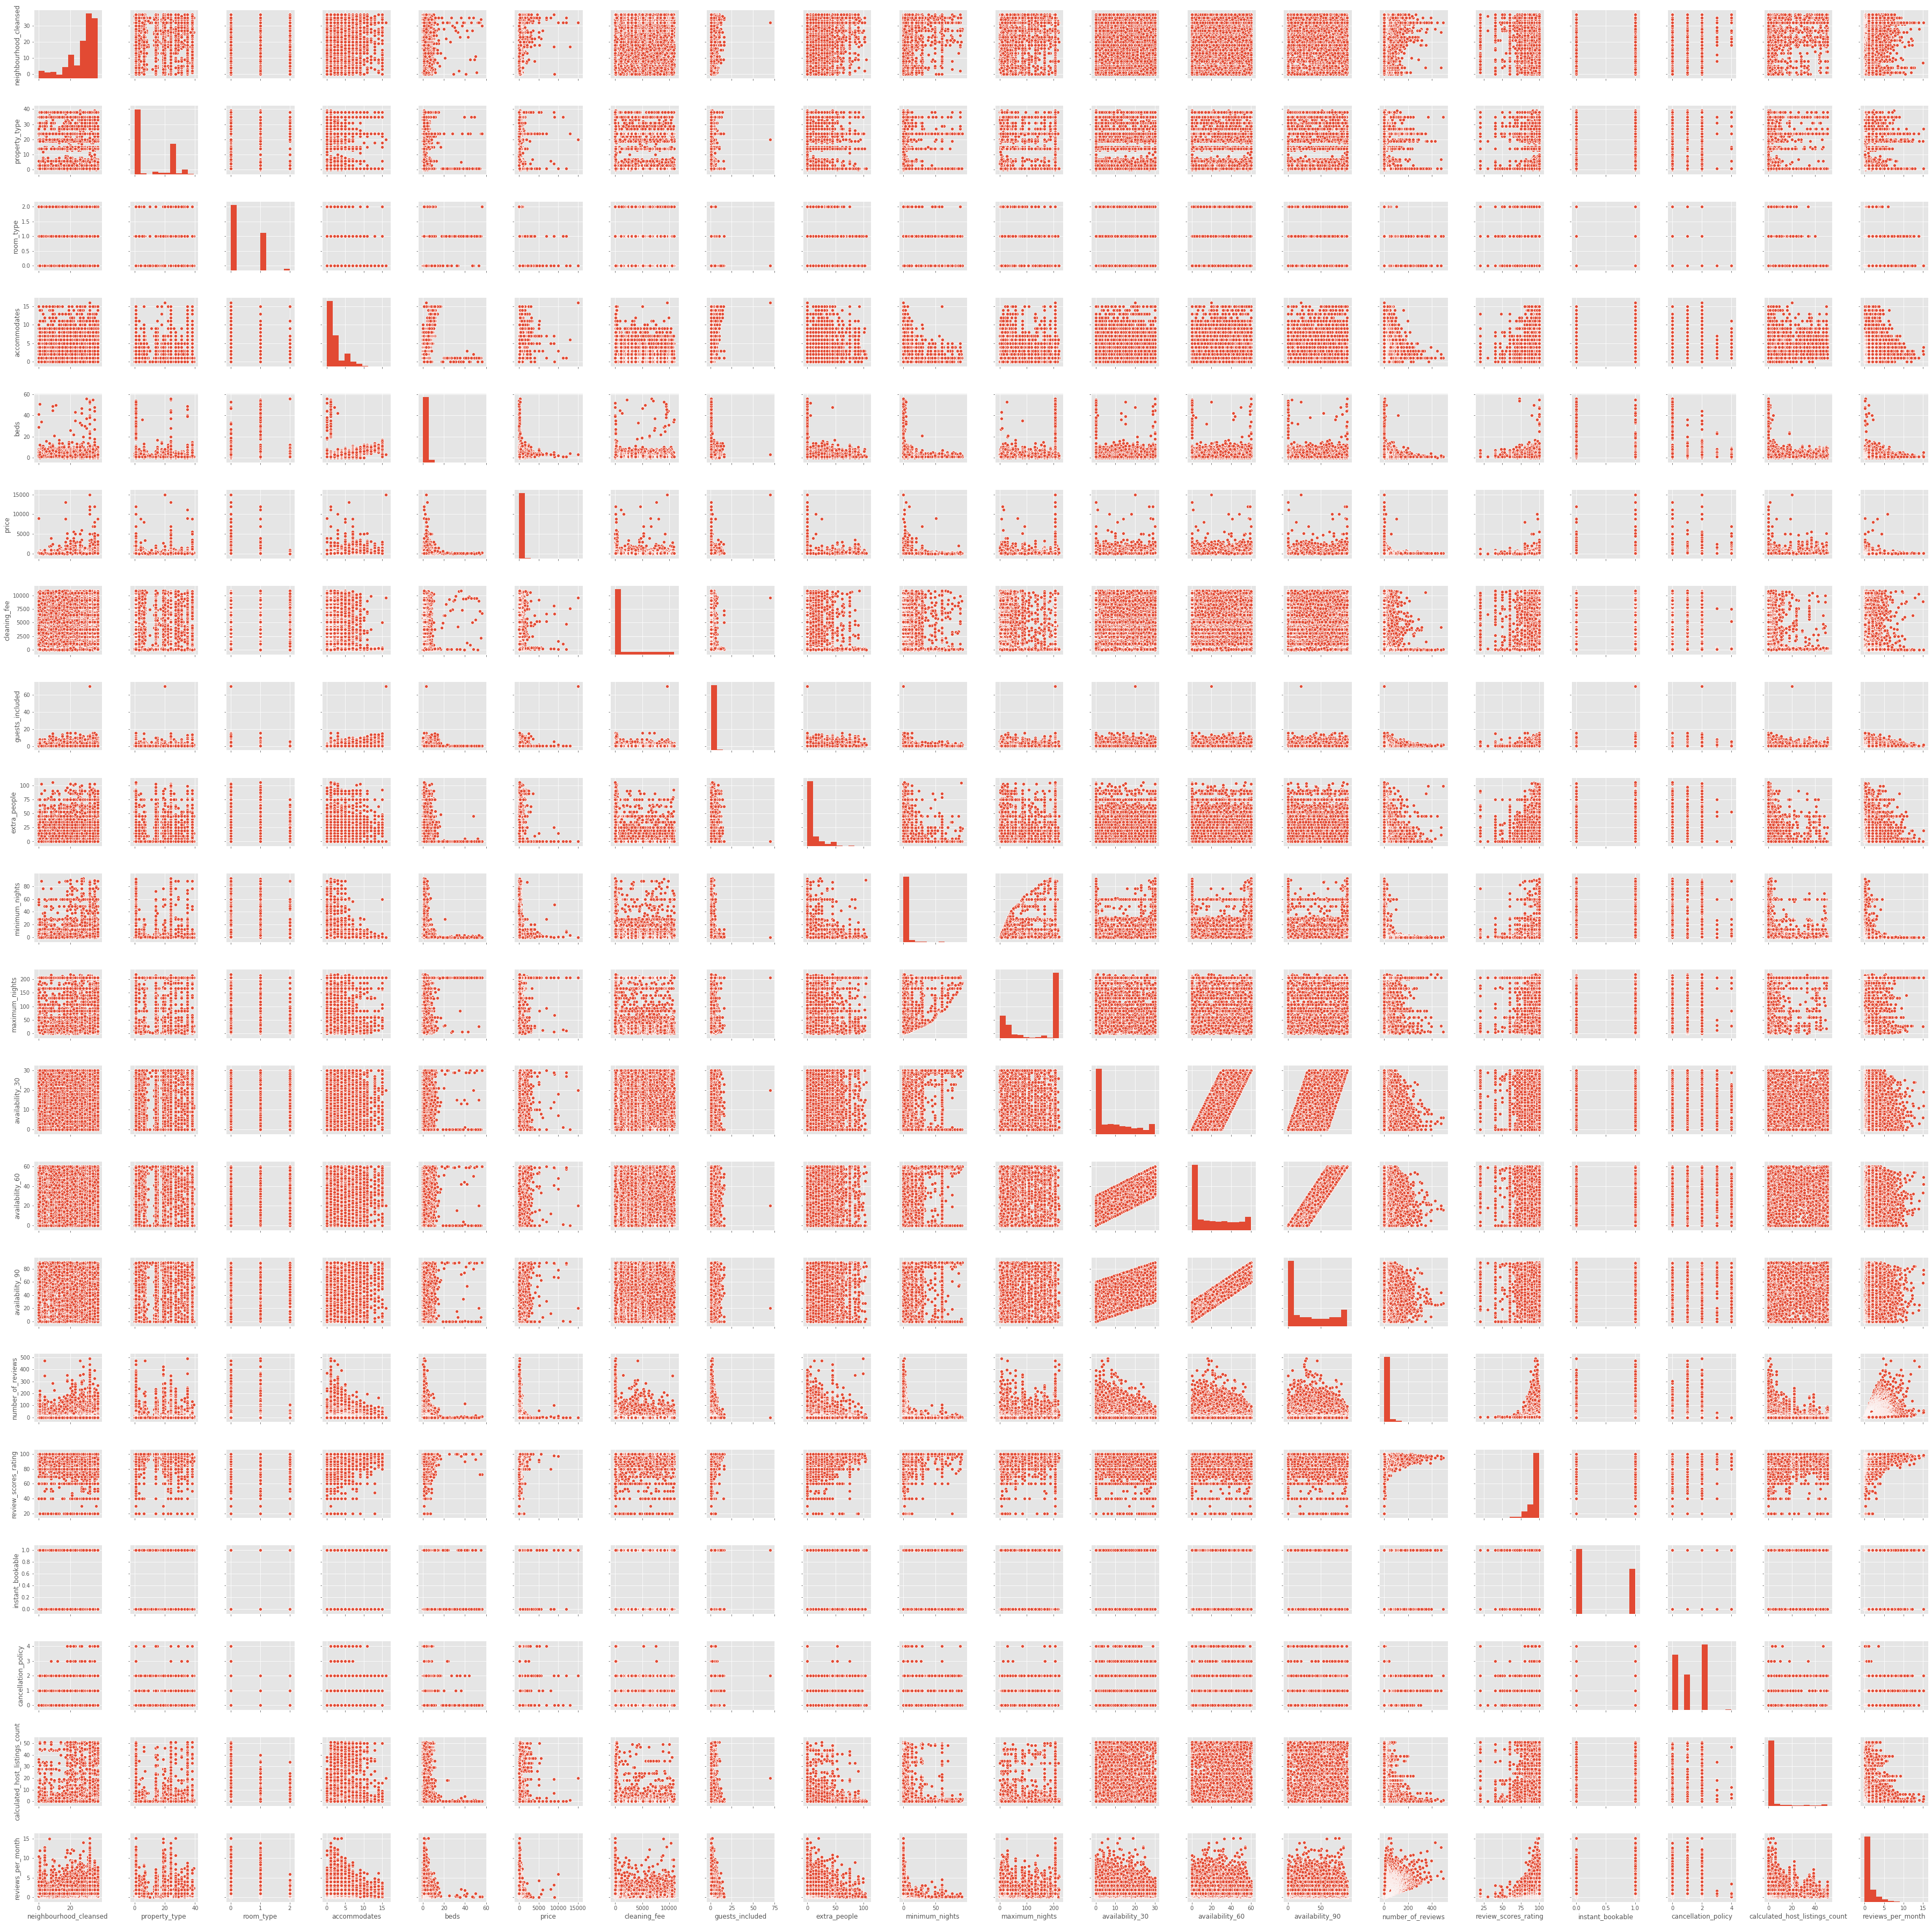

In [39]:
sns.pairplot(df)

In [40]:
from sklearn.model_selection import train_test_split

X, y = df.accommodates, df.price, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=5) 

In [41]:
median_review_scores_rating=math.floor(df.review_scores_rating.median())
median_reviews_per_month=math.floor(df.reviews_per_month.median())
median_neighbourhood_cleansed=math.floor(df.neighbourhood_cleansed.median())
median_accommodates=math.floor(df.accommodates.median())
median_room_type=math.floor(df.room_type.median())
median_beds=math.floor(df.beds.median())
df.review_scores_rating = df.accommodates.fillna(median_review_scores_rating)
df.reviews_per_month = df.accommodates.fillna(median_reviews_per_month)
df.neighbourhood_cleansed = df.accommodates.fillna(median_neighbourhood_cleansed)
df.accommodates = df.accommodates.fillna(median_accommodates)
df.room_type = df.accommodates.fillna(median_room_type)
df.beds = df.accommodates.fillna(median_beds)

In [42]:
df.neighbourhood_cleansed= df.neighbourhood_cleansed.values.reshape(-1, 1)
df.accommodates= df.accommodates.values.reshape(-1, 1)
df.room_type = df.room_type.values.reshape(-1, 1)
df.beds = df.beds.values.reshape(-1, 1)
df.price= df.price.values.reshape(-1, 1)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

X_scaled=pca.fit_transform(df)
X_scaled

array([[-1.63237726e+03, -1.20737532e+02,  1.23509301e+02,
        -6.58325181e+01,  4.79608058e+02,  5.98832249e+01],
       [-1.59009579e+03,  2.53482168e+02,  1.15644652e+02,
        -1.46661084e+01, -1.01195625e+01,  2.56584694e+01],
       [ 2.08379096e+03, -8.75196217e+01,  1.21091600e+02,
        -5.53876545e+01,  2.86085687e+02, -2.06121552e+01],
       ...,
       [ 2.08733028e+03, -1.48712162e+02, -7.30443141e+01,
         2.15124781e+01, -9.55319006e+00, -5.29723128e+00],
       [-1.56849164e+03, -4.67981935e+01, -7.22310192e+01,
        -6.60622959e+01, -2.41876726e+01, -1.35381120e+01],
       [ 9.23595362e+03, -7.00232067e+01, -8.25901863e+01,
         9.70308296e+00, -2.01663320e+00,  1.18339937e+00]])

# Using LinearRegression model

In [44]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred=regressor.predict(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']])
print(y_pred)

[110.19663216 382.31970661 132.31228585 ... 104.25342333 324.59062798
 141.80312405]


In [46]:
regressor.coef_

array([ 1.75605741e+01,  1.75605741e+01,  1.75605741e+01,  1.75605741e+01,
        1.54726168e+01,  5.05162857e-03, -3.34380193e+00,  1.43560811e+00])

In [47]:
regressor.intercept_

14.008516329577702

In [48]:
from sklearn.metrics import r2_score
print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

r2_score = 0.22650263588089936
median_absolute_error = 56.679155165007074


In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 8)
X_poly = poly_reg.fit_transform(df[['neighbourhood_cleansed','accommodates','room_type','beds']])

In [50]:
regressor.fit(X_poly, df.price)
y_pred = regressor.predict(X_poly)

In [51]:
print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

r2_score = 0.2751447006094646
median_absolute_error = 53.34046908738037


# Comparing model outcome

In [52]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.0005,max_iter=10000)
Lasso.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
y_pred=Lasso.predict(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']])
print(y_pred)

[110.19650076 382.32080565 132.31144448 ... 104.25406065 324.58952201
 141.80330728]


In [54]:
Lasso.coef_

array([ 7.02421313e+01,  2.69157960e-13,  0.00000000e+00,  0.00000000e+00,
        1.54718757e+01,  5.05156528e-03, -3.34332714e+00,  1.43560644e+00])

In [55]:
Lasso.intercept_

14.009087607688315

In [56]:
from sklearn.metrics import r2_score
print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

r2_score = 0.2265026358743054
median_absolute_error = 56.67984573827525


In [57]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.0005)
Lasso.fit(df[['accommodates',
        'beds']], df.price)

y_pred=Lasso.predict(df[['accommodates',
        'beds']])

from sklearn.metrics import r2_score
print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

r2_score = 0.22233410860196567
median_absolute_error = 54.416811848588424


In [58]:
y_pred

array([110.06509423, 388.76852946, 110.06509423, ..., 110.06509423,
       319.09267066, 110.06509423])

Text(0, 0.5, 'Median Absolute Error')

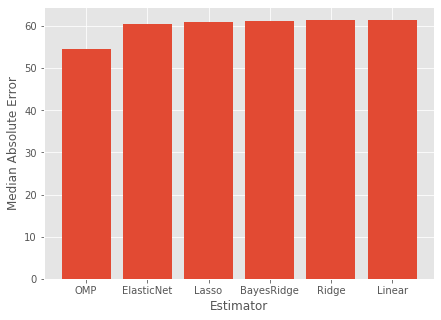

In [59]:
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1),
                                                    df.price, test_size=0.2, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')

# Using KNN model to achive the best outcome

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='auto',leaf_size = 10, n_neighbors=5)
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

y_pred=knn.predict(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']])
print(y_pred)

print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

[ 99.8 402.2  87.  ...  81.  238.8 159.4]
r2_score = 0.47715606718940684
median_absolute_error = 38.80000000000001


In [61]:
%%time
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'calculated_host_listings_count',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

CPU times: user 89.1 ms, sys: 5.89 ms, total: 95 ms
Wall time: 98.7 ms


KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='auto',leaf_size = 10, n_neighbors=5, weights='distance')
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

y_pred=knn.predict(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']])
print(y_pred)

print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

[ 94.5 471.  109.  ...  46.  170.   80. ]
r2_score = 0.8421093561794568
median_absolute_error = 5.333333333333329


In [63]:
%%time
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

CPU times: user 79.9 ms, sys: 4.42 ms, total: 84.4 ms
Wall time: 82.3 ms


KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [72]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='auto',leaf_size = 30, n_neighbors=10, weights='distance')
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

y_pred=knn.predict(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']])
print(y_pred)

print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

type(y_pred)

[ 94.5 471.  109.  ...  46.  170.   80. ]
r2_score = 0.8486292259530553
median_absolute_error = 5.0


numpy.ndarray

In [65]:
%%time
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'calculated_host_listings_count',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

CPU times: user 166 ms, sys: 6.88 ms, total: 173 ms
Wall time: 90.9 ms


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')

In [66]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='auto',leaf_size = 30, n_neighbors=20, weights='distance')
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

y_pred=knn.predict(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']])
print(y_pred)

print('r2_score =', r2_score(df.price,y_pred))
print('median_absolute_error =', metrics.median_absolute_error(df.price,y_pred))

[ 94.5 471.  109.  ...  46.  170.   80. ]
r2_score = 0.849627941097868
median_absolute_error = 5.200000000000003


In [67]:
%%time
knn.fit(df[['accommodates',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'calculated_host_listings_count',
        'cleaning_fee',
        'guests_included',
        'minimum_nights']], df.price)

CPU times: user 175 ms, sys: 8.85 ms, total: 184 ms
Wall time: 96.9 ms


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='distance')

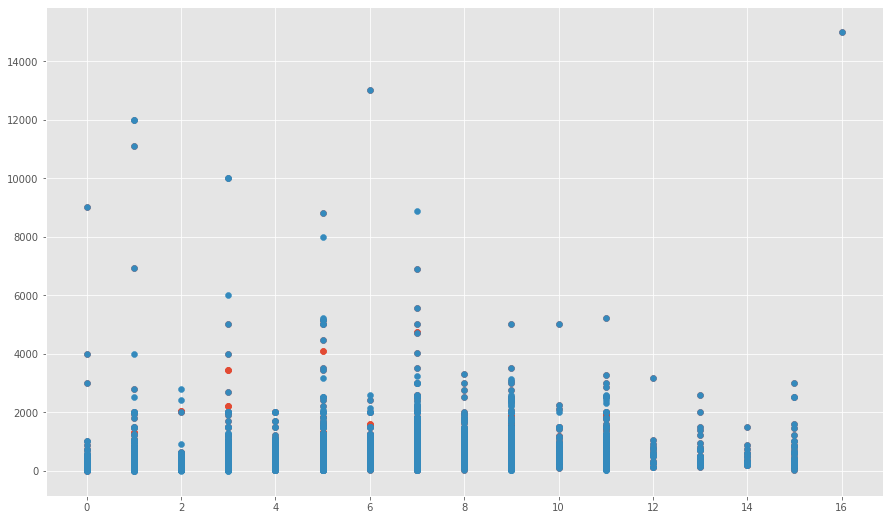

In [68]:
plt.scatter(df.neighbourhood_cleansed,y_pred)
plt.scatter(df.neighbourhood_cleansed,df.price)

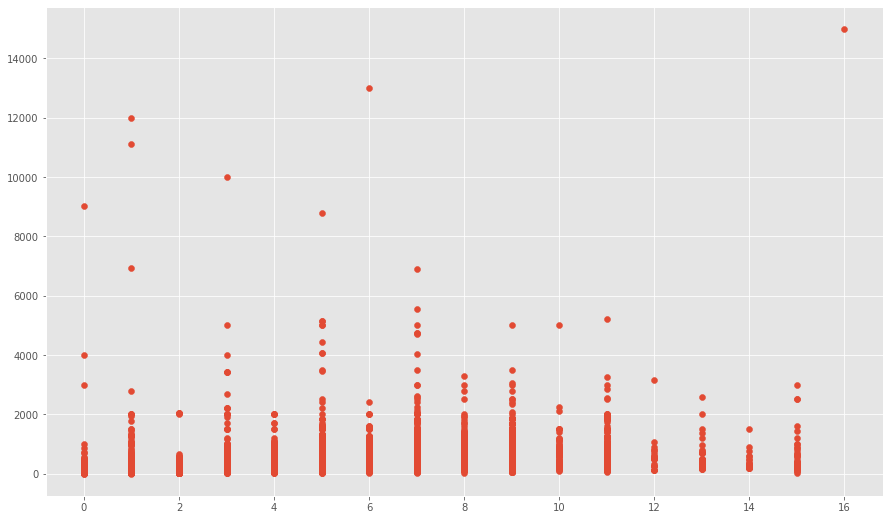

In [73]:
plt.scatter(df.neighbourhood_cleansed,y_pred)

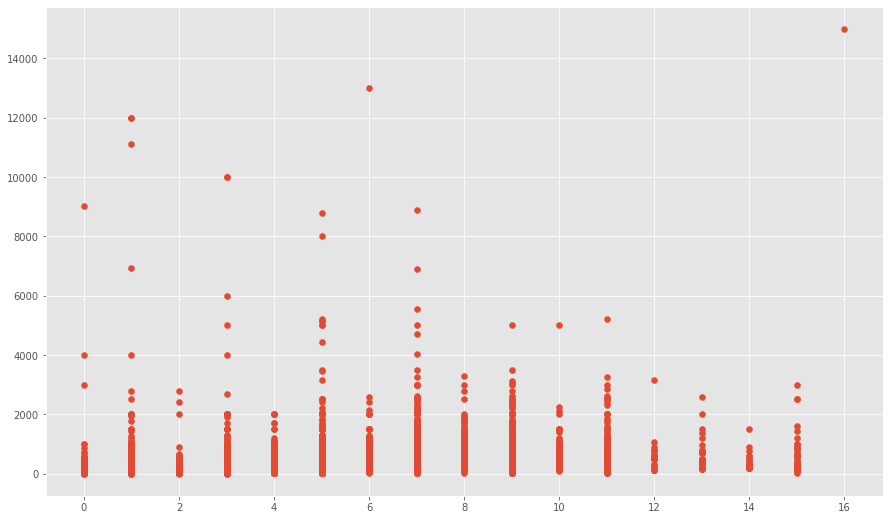

In [74]:
plt.scatter(df.neighbourhood_cleansed,df.price)